In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
from matplotlib import patches 

import seaborn as sns 
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb

import statsmodels.api as sm

from scipy.stats import linregress

In [2]:
style.use('fivethirtyeight')

rand_state=1000 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=rand_state)
folds = KFold(n_splits = 5, shuffle = True, random_state = rand_state)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Preparation

### 1.import data

In [3]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
train["SalePrice1"] = np.log1p(train["SalePrice"])
# train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
# test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
# train["SalePrice1"] = np.log1p(train["SalePrice"])

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  SalePrice1
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500   12.247699
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500   12.109016
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500   12.317171
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216    

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

### 2.missing values

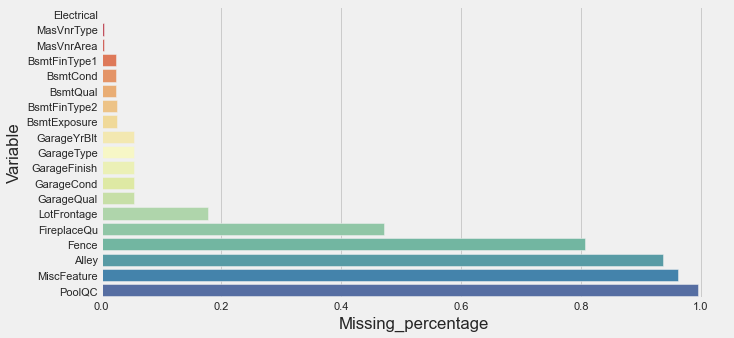

In [7]:
# missing value for each variables
def missing_percentage(df):
    nadf=(round(df.isna().sum().sort_values(ascending=True)/len(df),4)).reset_index()
    nadf.columns=['Variable','Missing_percentage']
    nadf=nadf[nadf['Missing_percentage']>0]

    if len(nadf)>0 :        
        fig, ax = plt.subplots(figsize=(10,5))
        sns.barplot(x='Missing_percentage',
               y='Variable',
               data=nadf,
               palette='Spectral')
    
    return nadf

train_na=missing_percentage(train)

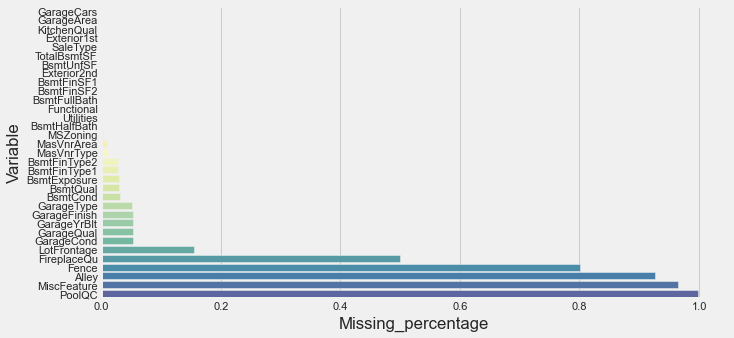

In [8]:
test_na=missing_percentage(test)

In [9]:
train_na['Variable']

63      Electrical
64      MasVnrType
65      MasVnrArea
66    BsmtFinType1
67        BsmtCond
68        BsmtQual
69    BsmtFinType2
70    BsmtExposure
71     GarageYrBlt
72      GarageType
73    GarageFinish
74      GarageCond
75      GarageQual
76     LotFrontage
77     FireplaceQu
78           Fence
79           Alley
80     MiscFeature
81          PoolQC
Name: Variable, dtype: object

In [10]:
test_na['Variable']

47      GarageCars
48      GarageArea
49     KitchenQual
50     Exterior1st
51        SaleType
52     TotalBsmtSF
53       BsmtUnfSF
54     Exterior2nd
55      BsmtFinSF1
56      BsmtFinSF2
57    BsmtFullBath
58      Functional
59       Utilities
60    BsmtHalfBath
61        MSZoning
62      MasVnrArea
63      MasVnrType
64    BsmtFinType2
65    BsmtFinType1
66    BsmtExposure
67        BsmtQual
68        BsmtCond
69      GarageType
70    GarageFinish
71     GarageYrBlt
72      GarageQual
73      GarageCond
74     LotFrontage
75     FireplaceQu
76           Fence
77           Alley
78     MiscFeature
79          PoolQC
Name: Variable, dtype: object

In [11]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

In [12]:
typicals=['ExterQual','ExterCond','BsmtQual','BsmtCond',
          'HeatingQC','KitchenQual','FireplaceQu','GarageQual',
          'GarageCond','PoolQC']
nos=['CentralAir']
nas=['FireplaceQu','Fence']

for col in typicals:
    train[col]=train[col].fillna('TA')
    test[col]=test[col].fillna('TA')
    
for col in nos:
    train[col]=train[col].fillna('N')
    test[col]=test[col].fillna('TA')

for col in nas:
    train[col]=train[col].fillna('NA')
    test[col]=test[col].fillna('TA')
    

In [13]:
# numeric columns
def numeric_columns(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric = df.select_dtypes(include=numerics)
    return df_numeric 

# object columns
def object_columns(df):
    objects = ['object']
    df_object = df.select_dtypes(include=objects)
    return df_object 

In [14]:
## Train Dataset
missing=train_na['Variable']
train_missing=train[missing]

# fill null values with 0 for numeric columns
for col in numeric_columns(train_missing).columns:
    if col !='LotFrontage':
        train[col]=train[col].fillna(0)
    
# fill null values with None for object columns
for col in object_columns(train_missing).columns:
    if col not in typicals and col not in nos and col not in nas:
        train[col]=train[col].fillna('None')

In [15]:
## test Dataset
missing=test_na['Variable']
test_missing=test[missing]

# fill null values with 0 for numeric columns
for col in numeric_columns(test_missing).columns:
    if col !='LotFrontage':
        test[col]=test[col].fillna(0)
    
# fill null values with None for object columns
for col in object_columns(test_missing).columns:
    if col not in typicals and col not in nos and col not in nas:
        test[col]=test[col].fillna('None')

In [16]:
missing_percentage(train)

Empty DataFrame
Columns: [Variable, Missing_percentage]
Index: []

In [17]:
missing_percentage(test)

Empty DataFrame
Columns: [Variable, Missing_percentage]
Index: []

## Explorary Data Analysis

In [18]:
train['SalePrice'].sort_values()

495      34900
916      35311
968      37900
533      39300
30       40000
         ...  
803     582933
898     611657
1169    625000
1182    745000
691     755000
Name: SalePrice, Length: 1460, dtype: int64

### 1. features most linearly correlated to target variable

In [19]:
# getting the correlation of all the features with target variable
cor1=(train.corr()**2)['SalePrice'].sort_values(ascending=False).to_frame() 
cor1.sort_values('SalePrice',ascending=False)[2:20]

# # log scaled correlations
# cor2=(train.corr()**2)['SalePrice1'].sort_values(ascending=False).to_frame() 
# cor=pd.merge(cor1, cor2, left_index=True, right_index=True)
# cor.rename(columns={'SalePrice1': 'Log SalePrice'},inplace=True)
# cor['diff']=cor['SalePrice']-cor['Log SalePrice']

SalePrice
OverallQual    0.625652
GrLivArea      0.502149
GarageCars     0.410124
GarageArea     0.388667
TotalBsmtSF    0.376481
1stFlrSF       0.367057
FullBath       0.314344
TotRmsAbvGrd   0.284860
YearBuilt      0.273422
YearRemodAdd   0.257151
MasVnrArea     0.223364
Fireplaces     0.218023
BsmtFinSF1     0.149320
LotFrontage    0.122413
WoodDeckSF     0.105244
2ndFlrSF       0.101974
OpenPorchSF    0.099765
HalfBath       0.080717

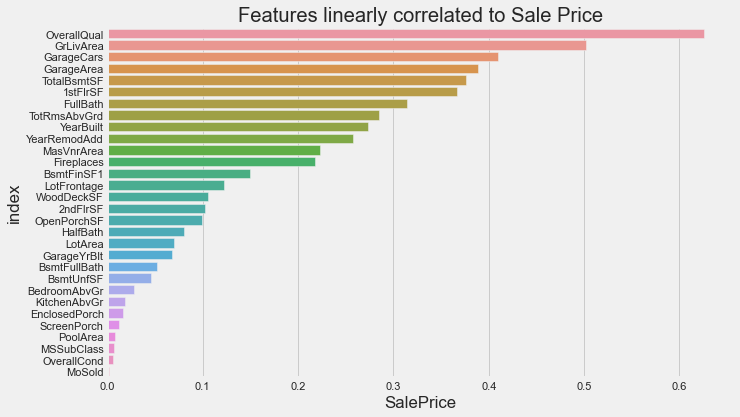

In [20]:
df_cor= cor1.reset_index().loc[2:]

plt.figure(figsize=(10,6))
plt.title('Features linearly correlated to Sale Price')
sns.barplot(y='index', x='SalePrice', data=df_cor.head(30))
plt.show()

### 2. check the bivariate distributions for features mostly linearly correlated to target variable.

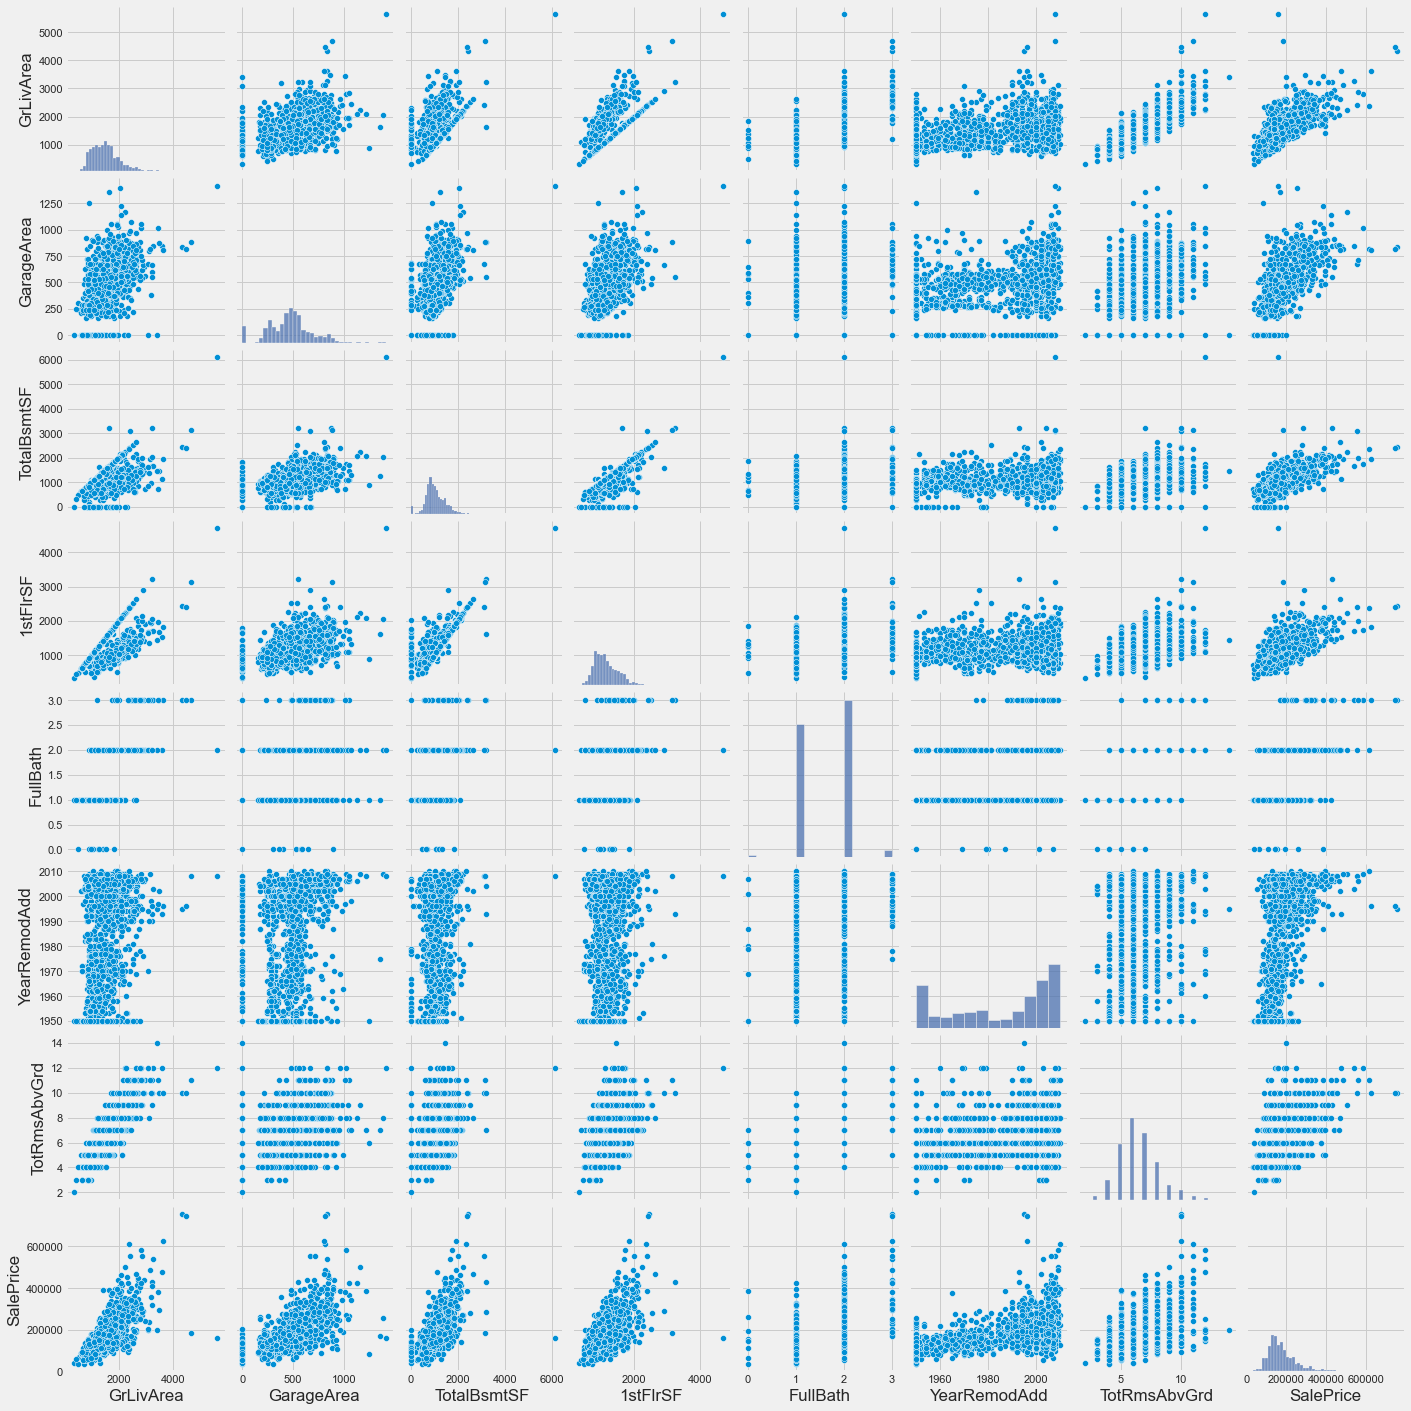

Wall time: 9.47 s


In [21]:
%%time

sns.pairplot(train[['GrLivArea',
                    'GarageArea',
                    'TotalBsmtSF',
                    '1stFlrSF',
                    'FullBath',
                    'YearRemodAdd',
                    'TotRmsAbvGrd',
                    'SalePrice']])
plt.show()

### 3. data distribution of target variable.

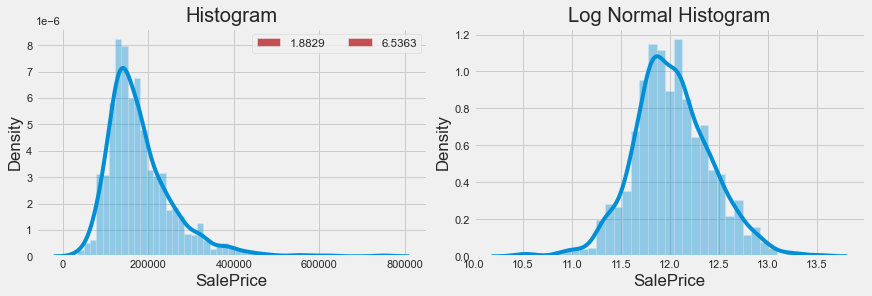

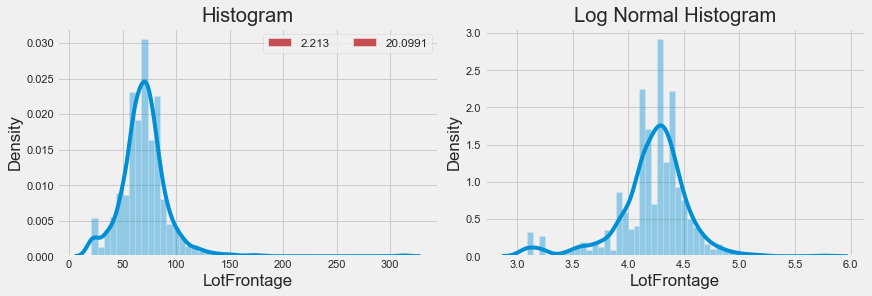

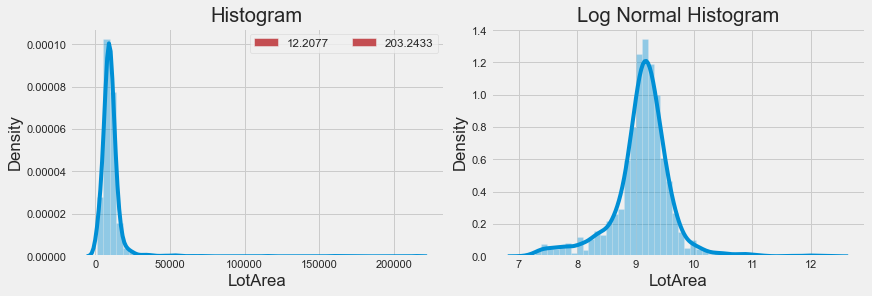

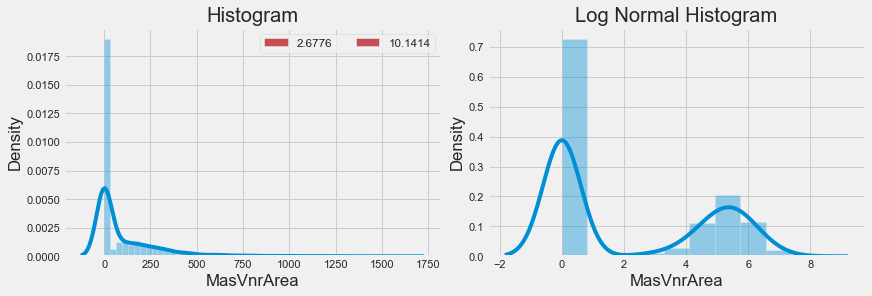

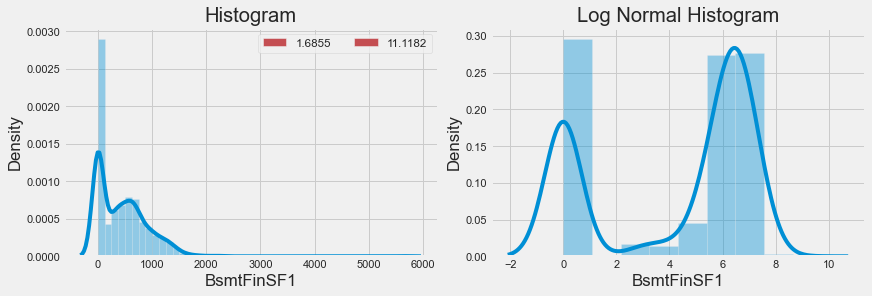

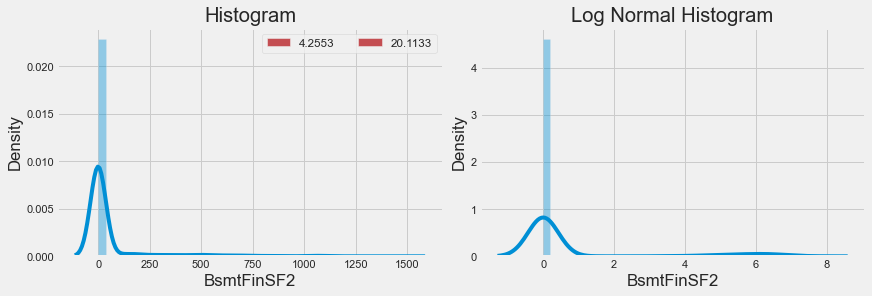

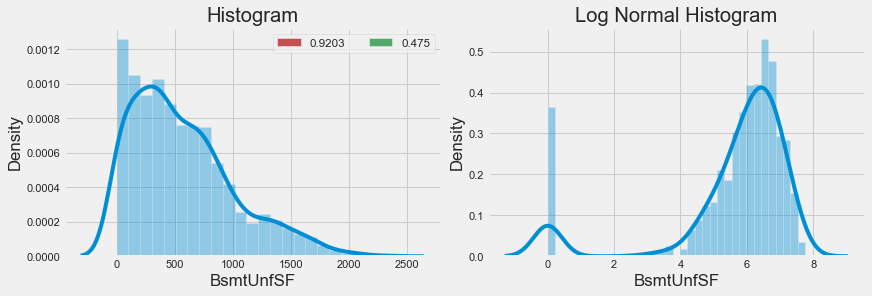

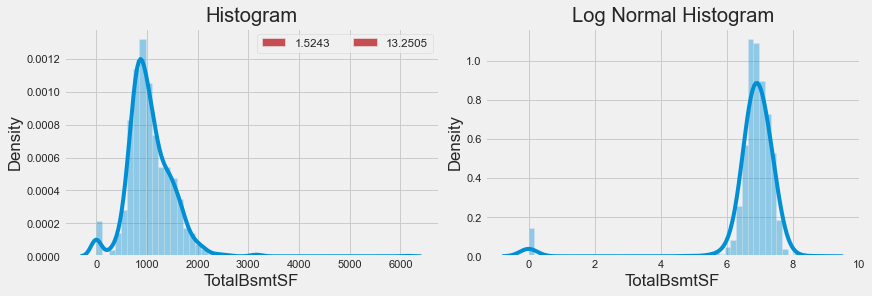

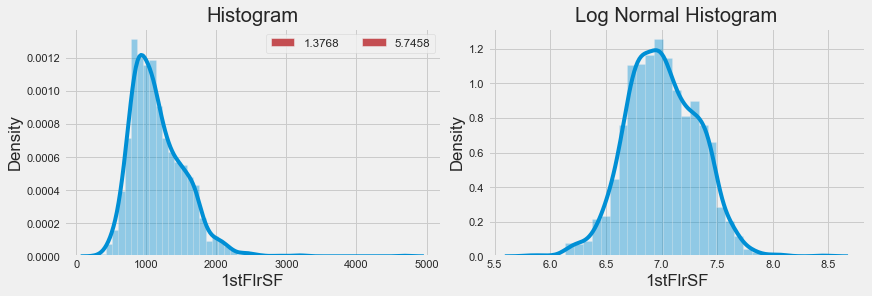

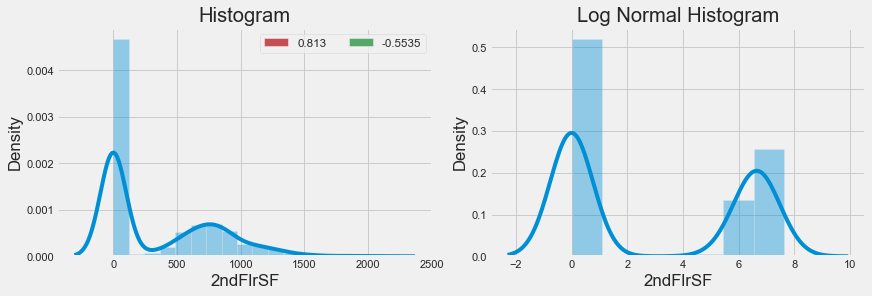

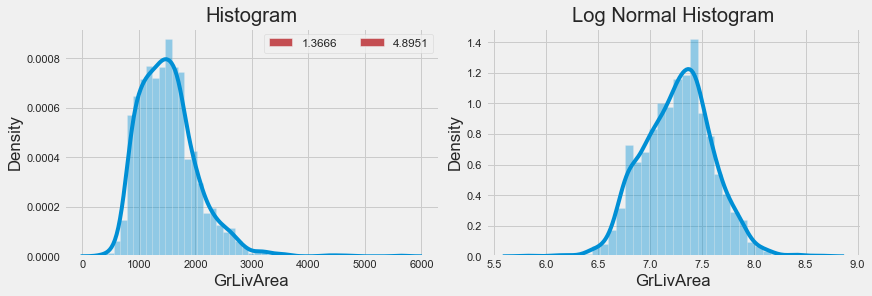

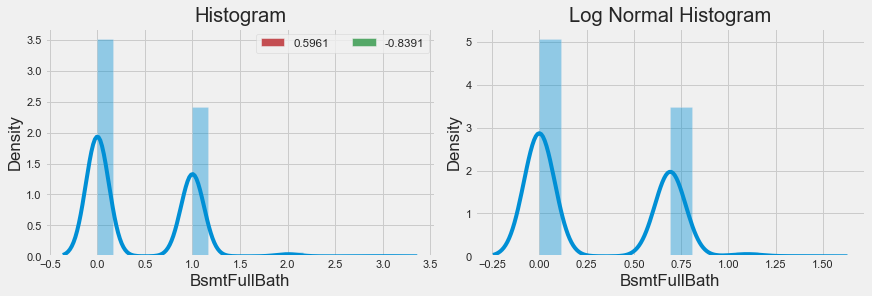

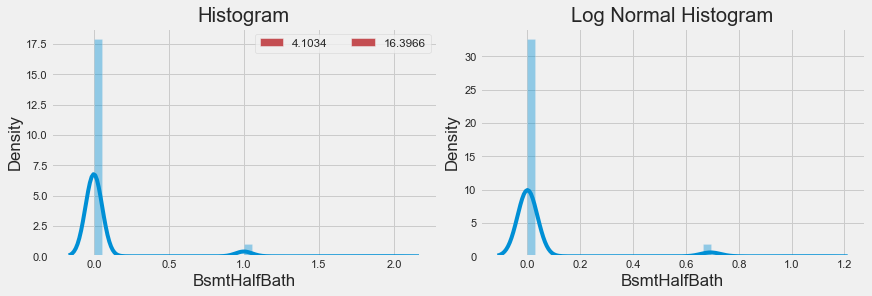

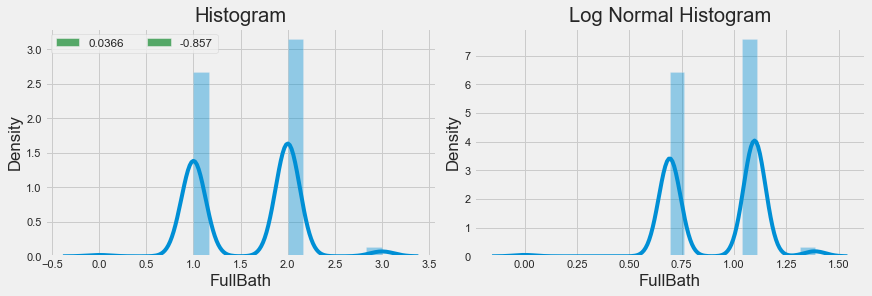

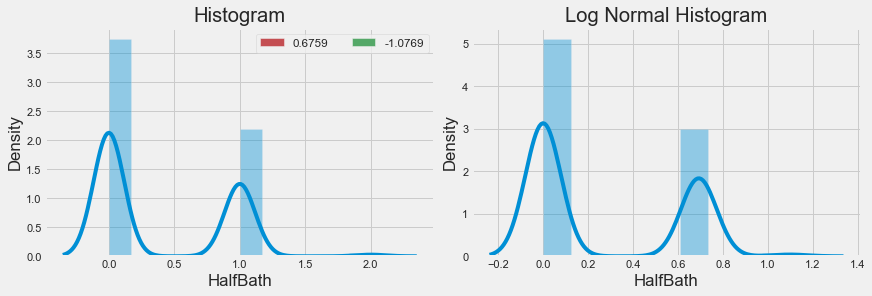

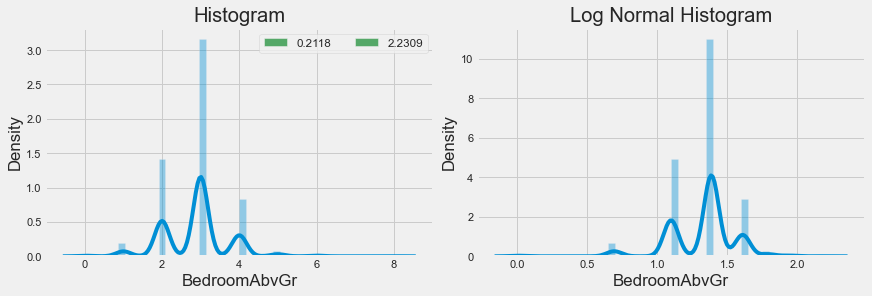

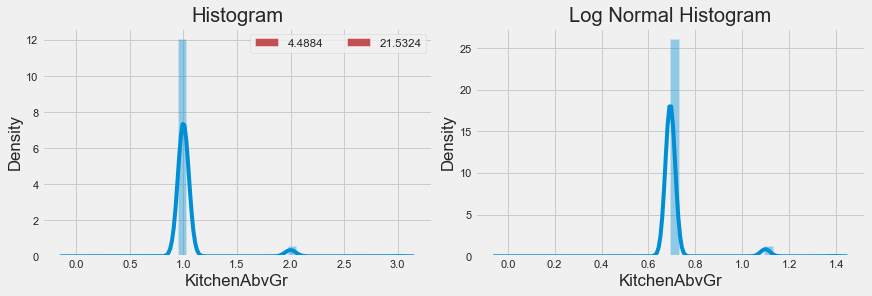

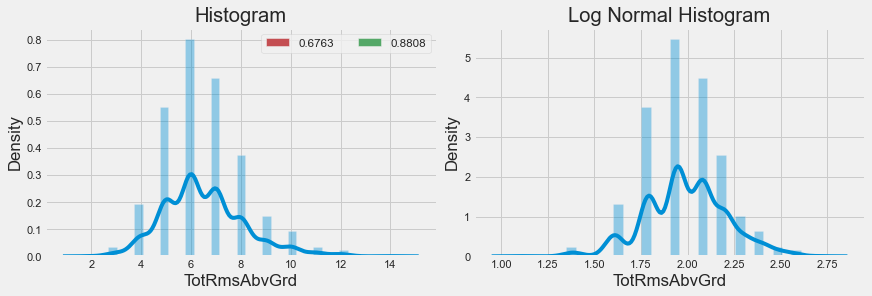

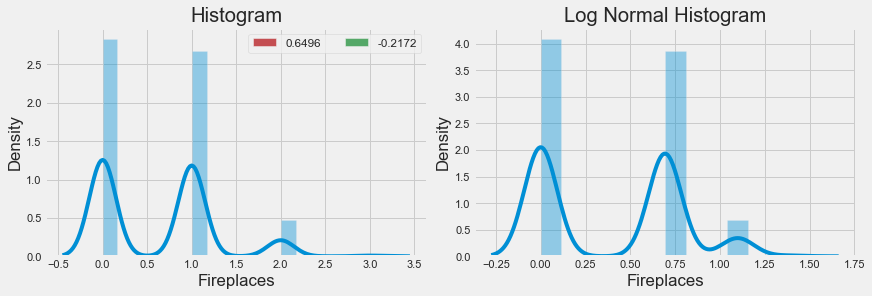

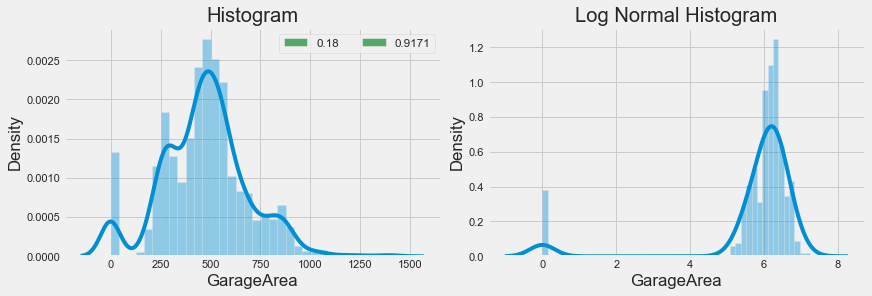

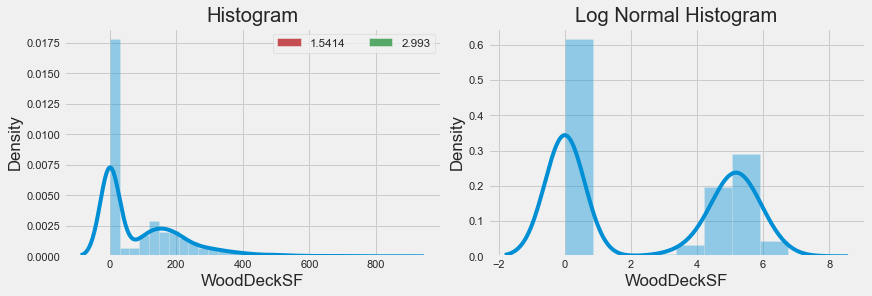

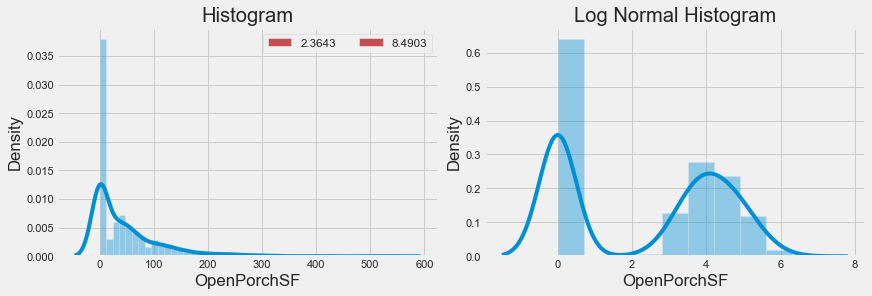

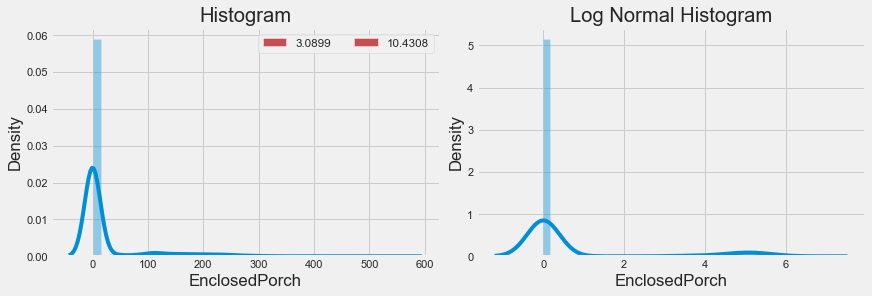

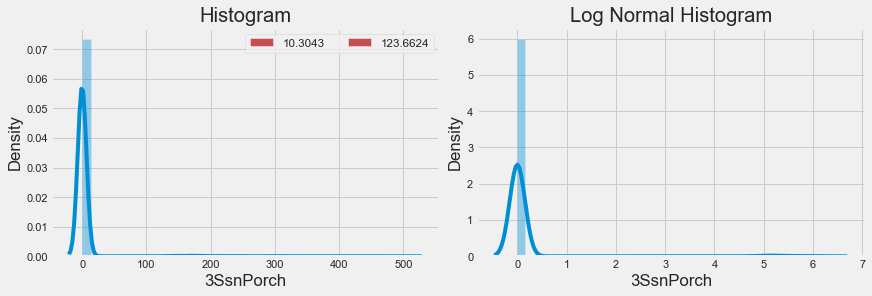

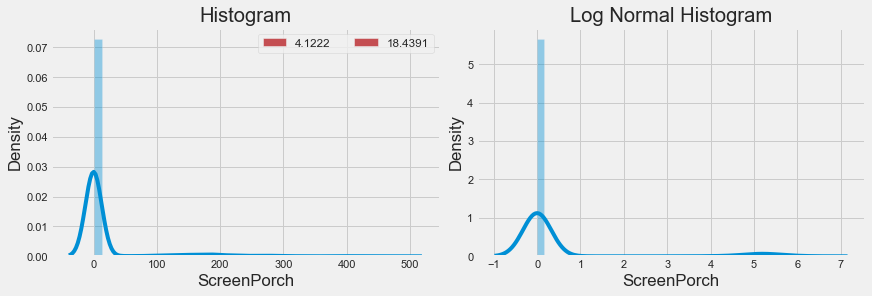

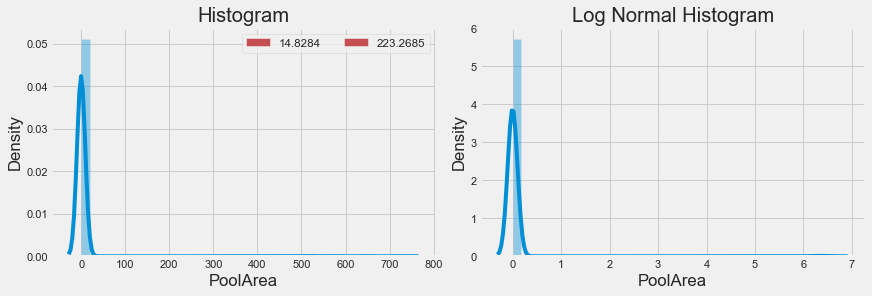

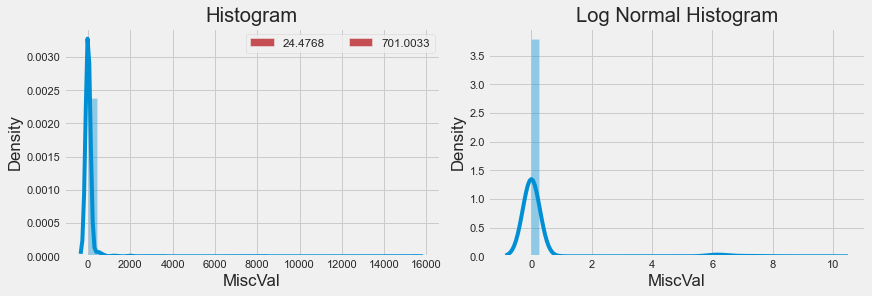

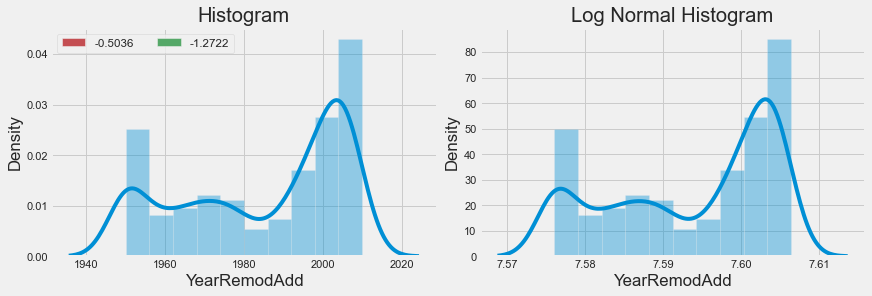

In [22]:
def plotting_3_chart(df, feature):

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,4))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, 0])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    
    skewness=round(train[feature].skew(),4)
    Kurtosis=round(train[feature].kurt(),4)
    
    if (skewness>0.5) | (skewness<-0.5):
        cs='red'
    else:
        cs='green'
        
    if (Kurtosis>3) |(Kurtosis<-2):
        ck='red'
    else:
        ck='green'
        
    skew_patch = patches.Patch(color=cs, label=skewness)
    plt.legend(handles=[skew_patch])
    Kurtosis_patch = patches.Patch(color=ck, label=skewness)
    plt.legend(handles=[Kurtosis_patch])
    
    colors = [cs, ck]    
    texts = [skewness, Kurtosis]
    patchList = []
    for i in range(len(texts)):
        data_key = patches.Patch(facecolor=colors[i][0], label=texts[i])
        patchList.append(data_key)

    plt.gca()
    plt.legend(handles=patchList,ncol=len(patchList), fontsize='small')
    
    
#     # customizing the QQ_plot. 
#     ax2 = fig.add_subplot(grid[1, 0])
#     ## Set the title. 
#     ax2.set_title('QQ_plot')
#     ## Plotting the QQ_Plot. 
#     stats.probplot(df.loc[:,feature], plot = ax2)

#     ## Customizing the Box Plot. 
#     ax3 = fig.add_subplot(grid[2, 0])
#     ## Set title. 
#     ax3.set_title('Box Plot')
#     ## Plotting the box plot. 
#     sns.boxplot(y=df.loc[:,feature], ax = ax3 )

    log_feature=np.log1p(train[feature])
    ax4 = fig.add_subplot(grid[0, 1])
    ## Set the title. 
    ax4.set_title('Log Normal Histogram')
    ax4.set_xlabel('Log '+feature)
    ## plot the log-scaled histogram. 
    sns.distplot(log_feature, norm_hist=True, ax = ax4)
    
#     # customizing the QQ_plot. 
#     ax5 = fig.add_subplot(grid[1, 1])
#     ## Set the title. 
#     ax5.set_title('QQ_plot')
#     ## Plotting the QQ_Plot. 
#     stats.probplot(log_feature, plot = ax5)

#     ## Customizing the Box Plot. 
#     ax6 = fig.add_subplot(grid[2, 1])
#     ## Set title. 
#     ax6.set_title('Box Plot')
#     ## Plotting the box plot. 
#     sns.boxplot(y=log_feature, ax = ax6 )
    
    # Skew and kurt
#     print(feature+"_Skewness: %f" % train[feature].skew())
#     print(feature+"_Kurtosis: %f" % train[feature].kurt())
    
plotting_3_chart(train, 'SalePrice')
plotting_3_chart(train, 'LotFrontage')
plotting_3_chart(train, 'LotArea')
plotting_3_chart(train, 'MasVnrArea')
plotting_3_chart(train, 'BsmtFinSF1')
plotting_3_chart(train, 'BsmtFinSF2')
plotting_3_chart(train, 'BsmtUnfSF')
plotting_3_chart(train, 'TotalBsmtSF')
plotting_3_chart(train, '1stFlrSF')
plotting_3_chart(train, '2ndFlrSF')
plotting_3_chart(train, 'GrLivArea')
plotting_3_chart(train, 'BsmtFullBath')
plotting_3_chart(train, 'BsmtHalfBath')
plotting_3_chart(train, 'FullBath')
plotting_3_chart(train, 'HalfBath')
plotting_3_chart(train, 'BedroomAbvGr')
plotting_3_chart(train, 'KitchenAbvGr')
plotting_3_chart(train, 'TotRmsAbvGrd')
plotting_3_chart(train, 'Fireplaces')
# plotting_3_chart(train, 'GarageCars')
plotting_3_chart(train, 'GarageArea')
plotting_3_chart(train, 'WoodDeckSF')
plotting_3_chart(train, 'OpenPorchSF')
plotting_3_chart(train, 'EnclosedPorch')
plotting_3_chart(train, '3SsnPorch')
plotting_3_chart(train, 'ScreenPorch')
plotting_3_chart(train, 'PoolArea')
plotting_3_chart(train, 'MiscVal')
plotting_3_chart(train, 'YearRemodAdd')
# plotting_3_chart(train, 'TotalSF')

From the plots above, we could see the target variable are skewed and Heteroscedastic(variance of residual are not the same). One way to fix this Heteroscedasticity is by using a transformation method like log-transformation or box-cox transformation.

### 4. SalePrice vs OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

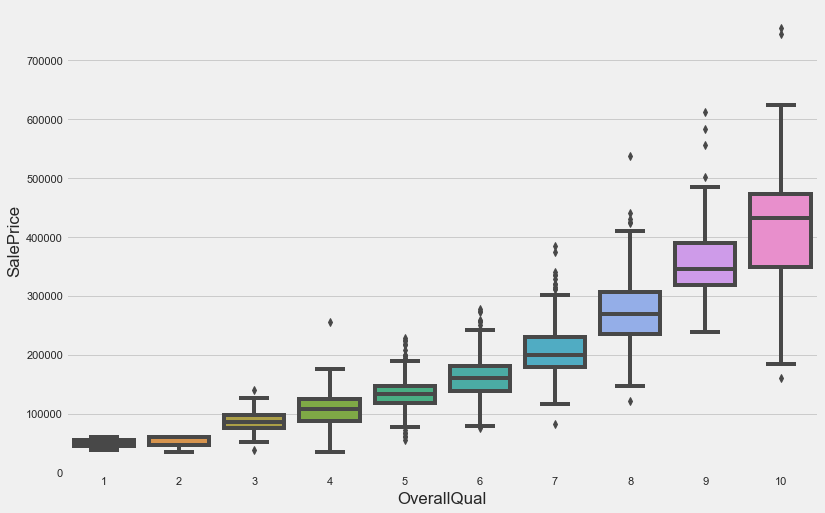

In [23]:
style.use('fivethirtyeight')
plt.subplots(figsize = (12,8))
sns.boxplot(x=train['OverallQual'], y=train["SalePrice"])

### 5. SalePrice vs Neighborhood

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

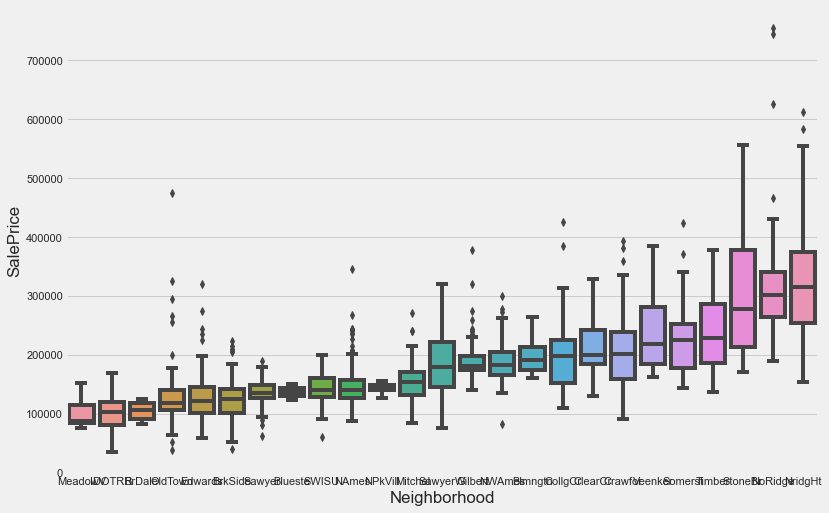

In [24]:
plt.subplots(figsize = (12,8))

feature_ord=train.groupby('Neighborhood').median().SalePrice.sort_values(ascending=True).index

sns.boxplot(x=train['Neighborhood'], y=train["SalePrice"],
           order=feature_ord)

### 6. Numeric features vs SalePrice

- check the polynomial trends

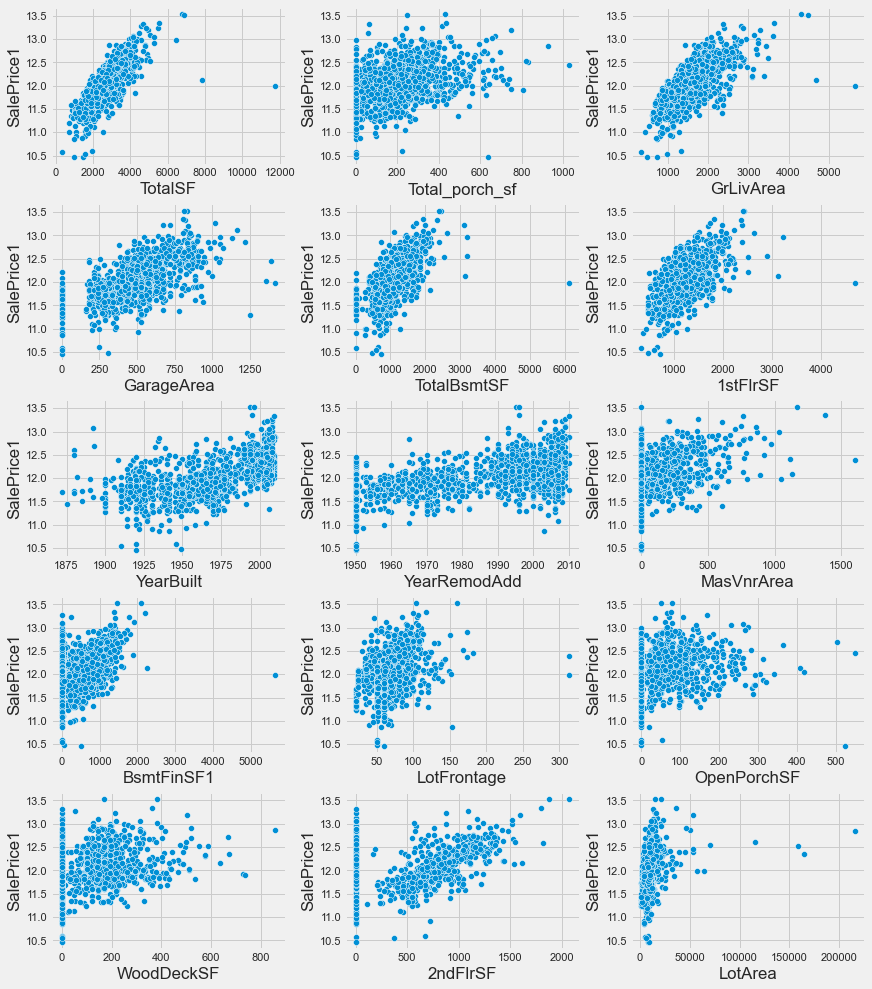

In [25]:
def plotting_numeric_feature_vs_target():

    fig = plt.figure(constrained_layout=True, figsize=(12,18))
    grid = gridspec.GridSpec(ncols=3, nrows=7, figure=fig)
    
    TotalSF=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
    Total_Bathrooms= (train['FullBath'] + (0.5 * train['HalfBath']) +
                                   train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
    Total_porch_sf= (train['OpenPorchSF'] + train['3SsnPorch'] +
                                  train['EnclosedPorch'] + train['ScreenPorch'] +
                                  train['WoodDeckSF'])
    
    ax1 = fig.add_subplot(grid[0, 0])
    sns.scatterplot(y = train.SalePrice1, x = TotalSF, ax = ax1)
    ax1.set(xlabel='TotalSF') 
    
    ax2 = fig.add_subplot(grid[0, 1])
    sns.scatterplot(y = train.SalePrice1, x = Total_porch_sf, ax = ax2)
    ax2.set(xlabel='Total_porch_sf') 
    
    
    ax3 = fig.add_subplot(grid[0, 2])
    sns.scatterplot(y = train.SalePrice1, x = train.GrLivArea, ax = ax3)
    
    
    ax4 = fig.add_subplot(grid[1, 0])
    sns.scatterplot(y = train.SalePrice1, x = train.GarageArea, ax = ax4)
    
    
    ax5 = fig.add_subplot(grid[1, 1])
    sns.scatterplot(y = train.SalePrice1, x = train.TotalBsmtSF, ax = ax5)
    
    
    ax6 = fig.add_subplot(grid[1, 2])
    sns.scatterplot(y = train.SalePrice1, x = train['1stFlrSF'], ax = ax6)
    
    
    ax7 = fig.add_subplot(grid[2, 0])
    sns.scatterplot(y = train.SalePrice1, x = train.YearBuilt, ax = ax7)    
    
    ax8 = fig.add_subplot(grid[2, 1])
    sns.scatterplot(y = train.SalePrice1, x = train.YearRemodAdd, ax = ax8)
    
    ax9 = fig.add_subplot(grid[2, 2])
    sns.scatterplot(y = train.SalePrice1, x = train.MasVnrArea, ax = ax9)
    
    ax10 = fig.add_subplot(grid[3, 0])
    sns.scatterplot(y = train.SalePrice1, x = train.BsmtFinSF1, ax = ax10)
    
    ax11 = fig.add_subplot(grid[3, 1])
    sns.scatterplot(y = train.SalePrice1, x = train.LotFrontage, ax = ax11)
    
    ax12 = fig.add_subplot(grid[3, 2])
    sns.scatterplot(y = train.SalePrice1, x = train.OpenPorchSF, ax = ax12)
    
    ax13 = fig.add_subplot(grid[4, 0])
    sns.scatterplot(y = train.SalePrice1, x = train.WoodDeckSF, ax = ax13)
    
    ax14 = fig.add_subplot(grid[4, 1])
    sns.scatterplot(y = train.SalePrice1, x = train['2ndFlrSF'], ax = ax14)
    
    ax15 = fig.add_subplot(grid[4, 2])
    sns.scatterplot(y = train.SalePrice1, x = train.LotArea, ax = ax15)
    
#     ax16 = fig.add_subplot(grid[5, 0])
#     sns.scatterplot(y = train.SalePrice1, x = train.BsmtUnfSF, ax = ax16)
    
#     ax17 = fig.add_subplot(grid[5, 1])
#     sns.scatterplot(y = train.SalePrice1, x = train.EnclosedPorch, ax = ax17)
    
#     ax18 = fig.add_subplot(grid[5, 2])
#     sns.scatterplot(y = train.SalePrice1, x = train.LowQualFinSF, ax = ax18)
    
#     ax19 = fig.add_subplot(grid[6, 0])
#     sns.scatterplot(y = train.SalePrice1, x = train.MiscVal, ax = ax19)
    
#     ax20 = fig.add_subplot(grid[6, 1])
#     sns.scatterplot(y = train.SalePrice1, x = train.BsmtFinSF2, ax = ax20)

plotting_numeric_feature_vs_target()

### 7. Check how different house features affect the SalePrice

No handles with labels found to put in legend.


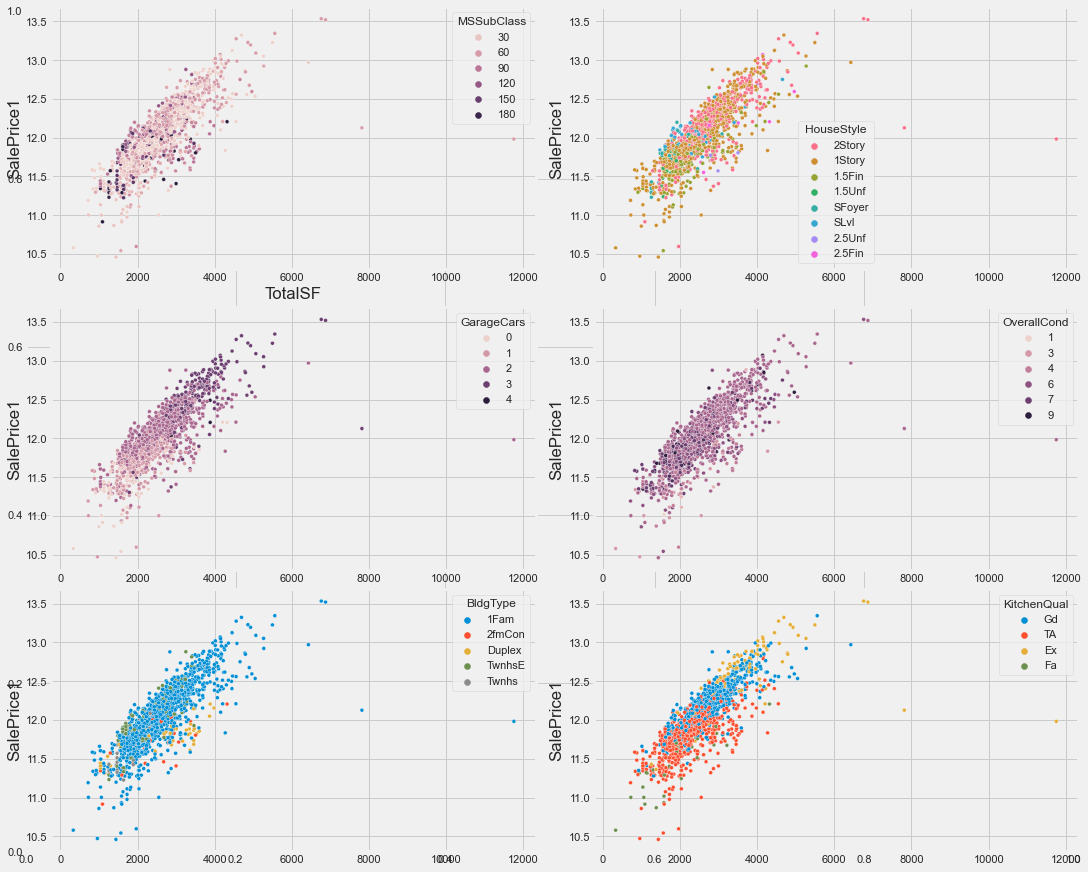

In [26]:
def plotting_totalsf_by_categories():    
    

    fig = plt.figure(constrained_layout=True, figsize=(15,12))
    grid = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
    
    TotalSF=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
    Total_Bathrooms= (train['FullBath'] + (0.5 * train['HalfBath']) +
                                   train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
    Total_porch_sf= (train['OpenPorchSF'] + train['3SsnPorch'] +
                                  train['EnclosedPorch'] + train['ScreenPorch'] +
                                  train['WoodDeckSF'])
    plt.legend(ncol=3,handleheight=2.4)
    
    ax1 = fig.add_subplot(grid[0, 0])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="MSSubClass",s=15, ax=ax1, data=train);
    ax1.set(xlabel='TotalSF') 
    
    ax2 = fig.add_subplot(grid[0, 1])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="HouseStyle",s=15, ax=ax2, data=train);
    ax1.set(xlabel='TotalSF') 
    
    ax3 = fig.add_subplot(grid[1, 0])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="GarageCars",s=15, ax=ax3, data=train);
    ax1.set(xlabel='TotalSF') 
    
    
    ax4 = fig.add_subplot(grid[1, 1])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="OverallCond",s=15, ax=ax4, data=train);
    ax1.set(xlabel='TotalSF') 
    
    ax5 = fig.add_subplot(grid[2, 0])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="BldgType",s=15, ax=ax5, data=train);
    ax1.set(xlabel='TotalSF') 
    
    ax6 = fig.add_subplot(grid[2, 1])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="KitchenQual",s=15, ax=ax6, data=train);
    ax1.set(xlabel='TotalSF') 
    
    plt.show()

plotting_totalsf_by_categories()

### 8. Ground Living Area Vs SalePrice 
- check outliers

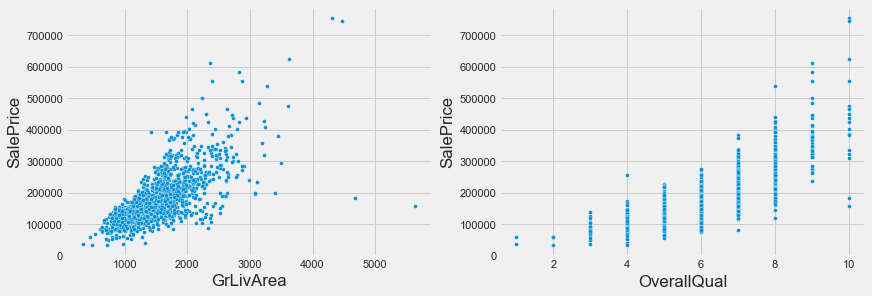

In [27]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])
sns.scatterplot(x=train.GrLivArea, y=train.SalePrice, s=15, data=train, ax=ax1);
ax2 = fig.add_subplot(grid[0, 1])
sns.scatterplot(x=train.OverallQual, y=train.SalePrice, s=15, data=train, ax=ax2);

### 9. basic statiscs for numeric variables

In [28]:
train.describe().T

count           mean           std           min            25%            50%            75%            max
Id             1460.0     730.500000    421.610009      1.000000     365.750000     730.500000    1095.250000    1460.000000
MSSubClass     1460.0      56.897260     42.300571     20.000000      20.000000      50.000000      70.000000     190.000000
LotFrontage    1460.0      70.199658     22.431902     21.000000      60.000000      70.000000      80.000000     313.000000
LotArea        1460.0   10516.828082   9981.264932   1300.000000    7553.500000    9478.500000   11601.500000  215245.000000
OverallQual    1460.0       6.099315      1.382997      1.000000       5.000000       6.000000       7.000000      10.000000
OverallCond    1460.0       5.575342      1.112799      1.000000       5.000000       5.000000       6.000000       9.000000
YearBuilt      1460.0    1971.267808     30.202904   1872.000000    1954.000000    1973.000000    2000.000000    2010.000000
YearRemodAdd   1460.0    1984.865753     20.645407   1950.000000    1967.000000    1994.000000    2004.000000    2010.000000
MasVnrArea     1460.0     103.117123    180.731373      0.000000       0.000000       0.000000     164.250000    1600.000000
BsmtFinSF1     1460.0     443.639726    456.098091      0.000000       0.000000     383.500000     712.250000    5644.000000
BsmtFinSF2     1460.0      46.549315    161.319273      0.000000       0.000000       0.000000       0.000000    1474.000000
BsmtUnfSF      1460.0     567.240411    441.866955      0.000000     223.000000     477.500000     808.000000    2336.000000
TotalBsmtSF    1460.0    1057.429452    438.705324      0.000000     795.750000     991.500000    1298.250000    6110.000000
1stFlrSF       1460.0    1162.626712    386.587738    334.000000     882.000000    1087.000000    1391.250000    4692.000000
2ndFlrSF       1460.0     346.992466    436.528436      0.000000       0.000000       0.000000     728.000000    2065.000000
LowQualFinSF   1460.0       5.844521     48.623081      0.000000       0.000000       0.000000       0.000000     572.000000
GrLivArea      1460.0    1515.463699    525.480383    334.000000    1129.500000    1464.000000    1776.750000    5642.000000
BsmtFullBath   1460.0       0.425342      0.518911      0.000000       0.000000       0.000000       1.000000       3.000000
BsmtHalfBath   1460.0       0.057534      0.238753      0.000000       0.000000       0.000000       0.000000       2.000000
FullBath       1460.0       1.565068      0.550916      0.000000       1.000000       2.000000       2.000000       3.000000
HalfBath       1460.0       0.382877      0.502885      0.000000       0.000000       0.000000       1.000000       2.000000
BedroomAbvGr   1460.0       2.866438      0.815778      0.000000       2.000000       3.000000       3.000000       8.000000
KitchenAbvGr   1460.0       1.046575      0.220338      0.000000       1.000000       1.000000       1.000000       3.000000
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.000000       5.000000       6.000000       7.000000      14.000000
Fireplaces     1460.0       0.613014      0.644666      0.000000       0.000000       1.000000       1.000000       3.000000
GarageYrBlt    1460.0    1868.739726    453.697295      0.000000    1958.000000    1977.000000    2001.000000    2010.000000
GarageCars     1460.0       1.767123      0.747315      0.000000       1.000000       2.000000       2.000000       4.000000
GarageArea     1460.0     472.980137    213.804841      0.000000     334.500000     480.000000     576.000000    1418.000000
WoodDeckSF     1460.0      94.244521    125.338794      0.000000       0.000000       0.000000     168.000000     857.000000
OpenPorchSF    1460.0      46.660274     66.256028      0.000000       0.000000      25.000000      68.000000     547.000000
EnclosedPorch  1460.0      21.954110     61.119149      0.000000       0.000000       0.000000       0.000000     552.000000
3SsnPorch      1

## Feature Transformation

Using log scaled target variable as the predict variable.

In [29]:
train['SalePrice']=train['SalePrice1']
X=train.drop('SalePrice1',axis=1)

### 1. Categorical Features

In [30]:
numeric_columns(train).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice1'], dtype='object')

In [31]:
numeric_columns(train).nunique().sort_values(ascending=True)

HalfBath            3
BsmtHalfBath        3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
YrSold              5
GarageCars          5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        98
YearBuilt         112
LotFrontage       115
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice1        663
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

In [32]:
# check the unique values of numeric variables
object_columns(train).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [33]:
def cat_features(df, ls):
    for l in ls:
        df[l]=df[l].astype(str)
    return df

cat_fns=['MSSubClass','YrSold','MoSold']
cat_features(train, cat_fns)
cat_features(test, cat_fns)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal
3     1464         60       RL         78.0     9978   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA      PConc       TA       TA           No          GLQ       602.0          Unf         0.0      324.0        926.0    GasA        Ex          Y      S

### 2. Adding sum variables

In [34]:
def sum_features(df):
    df['TotalSF']=train['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                                   df['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
    df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                                  df['EnclosedPorch'] + df['ScreenPorch'] +
                                  df['WoodDeckSF'])
    return df

sum_features(train)
sum_features(test)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  TotalSF  Total_Bathrooms  Total_porch_sf
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal   1752.0              1.0             260
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal   2591.0              2.0             429
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal   2549.0              2.5             246
3     1464         60       RL         78.0     9978   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace        20.0    

### 3. Adding binary features

In [35]:
def binary_features(df):
    df['haspool'] = df['PoolArea'].apply(lambda x: 'Y' if x > 0 else 'N')
    df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 'Y' if x > 0 else 'N')
    df['hasgarage'] = df['GarageArea'].apply(lambda x: 'Y' if x > 0 else 'N')
    df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 'Y' if x > 0 else 'N')
    df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 'Y' if x > 0 else 'N')
    return df

binary_features(train)
binary_features(test)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal   1752.0              1.0             260       N           N         Y       Y            N
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal   2591.0              2.0             429       N           N         Y       Y            N
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal   2549.0              2.5             246       N           Y         Y       Y            Y
3     1464         60       RL         78.0     9978   Pave  None      IR1         Lvl  

### 4. Adding log features

In [36]:
def log_features(df, ls):
    for l in ls:
        df[l+'_log'] = np.log1p(df[l])
    return df

log_fns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']
log_features(train,log_fns)
log_features(test,log_fns)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  LotFrontage_log  \
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal   1752.0              1.0             260       N           N         Y       Y            N         4.394449   
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal   2591.0              2.0             429       N           N         Y       Y            N         4.406719   
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal   2549.0              2.5             246       N           Y         Y       Y            Y         4.317488   
3     14

### 5. Adding squared features

In [37]:
def sqr_features(df, ls):
    for l in ls:
        df[l+'_sqr']=df[l]*df[l]
    return df

sqr_fns = ['TotalSF_log','GrLivArea_log', 'GarageArea','TotalBsmtSF_log',
            '1stFlrSF_log','YearBuilt','FullBath_log','2ndFlrSF_log']

sqr_features(train,sqr_fns)
sqr_features(test,sqr_fns)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  LotFrontage_log  \
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal   1752.0              1.0             260       N           N         Y       Y            N         4.394449   
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal   2591.0              2.0             429       N           N         Y       Y            N         4.406719   
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal   2549.0              2.5             246       N           Y         Y       Y            Y         4.317488   
3     14

In [38]:
def drop_logscale(df, ls):
    for l in ls:
        df=df.drop([l], axis=1)
    return df
drop_logscale(train,log_fns)
drop_logscale(test,log_fns)

Id MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageArea GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature MoSold YrSold SaleType SaleCondition  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  LotFrontage_log  LotArea_log  MasVnrArea_log  BsmtFinSF1_log  BsmtFinSF2_log  BsmtUnfSF_log  TotalBsmtSF_log  1stFlrSF_log  2ndFlrSF_log  LowQualFinSF_log  GrLivArea_log  BsmtFullBath_log  BsmtHalfBath_log  FullBath_log  HalfBath_log  BedroomAbvGr_log  KitchenAbvGr_log  TotRmsAbvGrd_log  Fireplaces_log  GarageCars_log  WoodDeckSF_log  OpenPorchSF_log  \
0     1461         20       RH   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961     Gable  CompShg     VinylSd     VinylSd       None        TA        TA     CBlock       TA       TA           No          Rec          LwQ    GasA        TA          Y      SBrkr          TA        Typ          TA     Attchd       1961.0          Unf       730.0         TA         TA          Y     TA  MnPrv        None      6   2010       WD        Normal              1.0             260       N           N         Y       Y            N         4.394449     9.360741        0.000000        6.150603        4.976734       5.602119         6.783325      6.799056      0.000000               0.0       6.799056          0.000000          0.000000      0.693147      0.000000          1.098612          0.693147          1.791759        0.000000        0.693147        4.948760         0.000000   
1     1462         20       RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock       TA       TA           No          ALQ          Unf    GasA        TA          Y      SBrkr          Gd        Typ          TA     Attchd       1958.0          Unf       312.0         TA         TA          Y     TA     TA        Gar2      6   2010       WD        Normal              2.0             429       N           N         Y       Y            N         4.406719     9.565775        4.691348        6.828712        0.000000       6.008813         7.192934      7.192934      0.000000               0.0       7.192934          0.000000          0.000000      0.693147      0.693147          1.386294          0.693147          1.945910        0.000000        0.693147        5.976351         3.610918   
2     1463         60       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997     Gable  CompShg     VinylSd     VinylSd       None        TA        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Gd          Y      SBrkr          TA        Typ          TA     Attchd       1997.0          Fin       482.0         TA         TA          Y     TA  MnPrv        None      3   2010       WD        Normal              2.5             246       N           Y         Y       Y            Y         4.317488     9.534668        0.000000        6.674561        0.000000       4.927254         6.834109      6.834109      6.553933               0.0       7.396335          0.000000          0.000000      1.098612      0.693147          1.386294          0.693147          1.945910        0.693147        1.098612        5.361292         3.555348   
3     1464         60       RL   Pave  None     

### 6. Normalizing skewed features

In [39]:

def normalizing_skewed(df):    
    skew_features = numeric_columns(df).apply(lambda x: skew(x)).sort_values(ascending=False)

    high_skew = skew_features[skew_features > 0.5]
    skew_index = high_skew.index

    print("There are {} numerical features in with Skew > 0.5 :".format(high_skew.shape[0]))

    # Normalize skewed features
    for i in skew_index:
        if i=='SalePrice':
            df[i] = boxcox1p(df[i], 0.3)
        else:
            df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))
        
normalizing_skewed(train)
normalizing_skewed(test)

There are 39 numerical features in with Skew > 0.5 :
There are 39 numerical features in with Skew > 0.5 :


## Data Cleansing

In [40]:
# # z-score greater than 3
# train_num=numeric_columns(train)
# z=np.abs(stats.zscore(train_num))
# df_z1=z[(z['SalePrice']>3) | (z['SalePrice1']>3)]

# # IQR 
# Q1=train_num.quantile(0.25)
# Q3=train_num.quantile(0.75)
# IQR=(Q3-Q1)
# df_iqr=(train_num<(Q1-1.5*IQR)) | (train_num>(Q3+1.5*IQR))
# df_iqr1=df_iqr[(df_iqr['SalePrice']) | (df_iqr['SalePrice1'])]

# d1=pd.merge(df_z1, df_iqr1, left_index=True, right_index=True)
# d1
# print('number of rows with Z-score > 3: ', len(df_z1))
# print('number of rows with value outside boundary of 1.5 * IQR: ', len(df_iqr1))
# print('number of rows meeting with both above conditions: ', len(d1))
# drop outliers
# train=train.drop(index)
# train

# index = d1.index
# print('index of outliers:', index.tolist())


train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)


In [41]:
# train.dtype+1*train

## Split data set into Train and Test

In [42]:
train['SalePrice']=train['SalePrice1']
train=train.drop('SalePrice1',axis=1)

train_objs_num = len(train)

df_full = pd.concat(objs=[train, test], axis=0)
df_full_dummy = pd.get_dummies(df_full, drop_first=True)

train_dummy = df_full_dummy[:train_objs_num]
test_dummy = df_full_dummy[train_objs_num:]

test_dummy=test_dummy.drop('SalePrice',axis=1)

# train_dummy=pd.get_dummies(train, drop_first=True)
# test_dummy=pd.get_dummies(test, drop_first=True)

y=train['SalePrice']
X=train.drop('SalePrice',axis=1)

yd=train_dummy['SalePrice']
Xd=train_dummy.drop('SalePrice',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.2, random_state=rand_state)

sc = StandardScaler()
Xd_sc_train = sc.fit_transform(Xd_train)
Xd_sc_test = sc.fit_transform(Xd_test)

test_sc=sc.fit_transform(test_dummy)


# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.8

In [43]:
train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 336 entries, Id to hasfireplace_Y
dtypes: float64(68), int64(7), uint8(261)
memory usage: 1.2 MB


## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

## Penalized Regression Analysis

### 1. Plotting regression coefficients vs alphas:

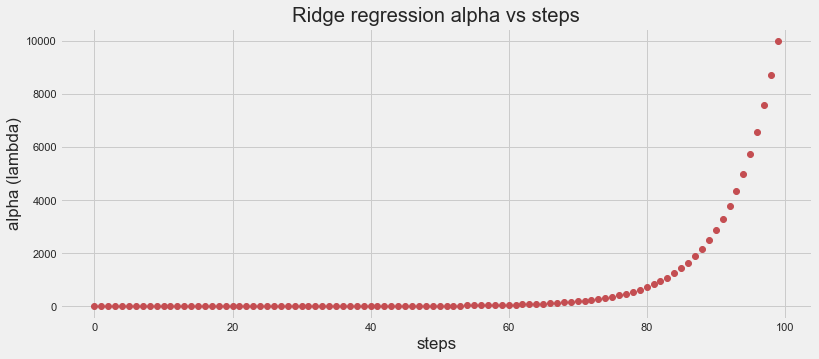

In [45]:
# Ridge
alpha_ridge = 10**np.linspace(-2,4,100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge,'or' )
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.title('Ridge regression alpha vs steps')
plt.show()

In [46]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(Xd_train, yd_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 335)

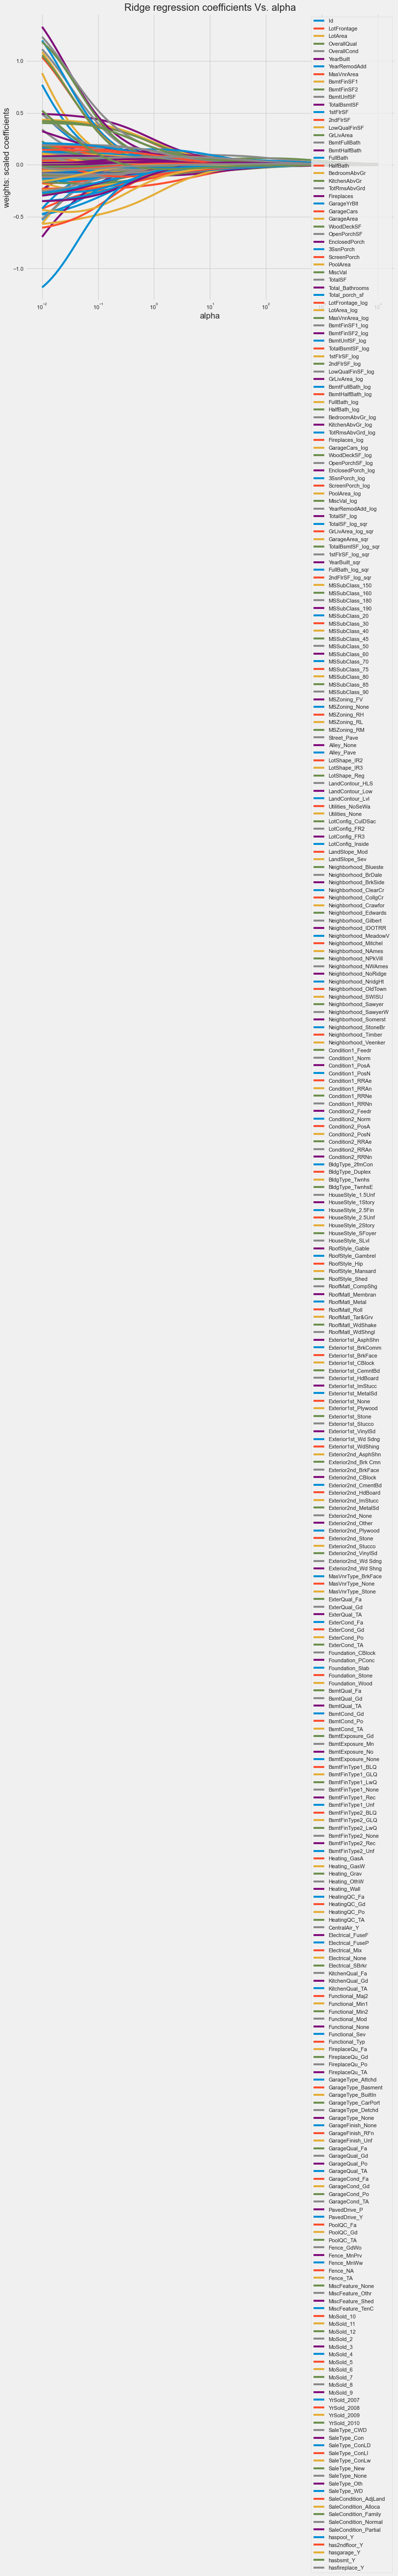

In [47]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(Xd_train.columns)

plt.show()

In [48]:
# Lassso
alpha_lasso = 10**np.linspace(-3,1,100)

lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(Xd_train, yd_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 335)

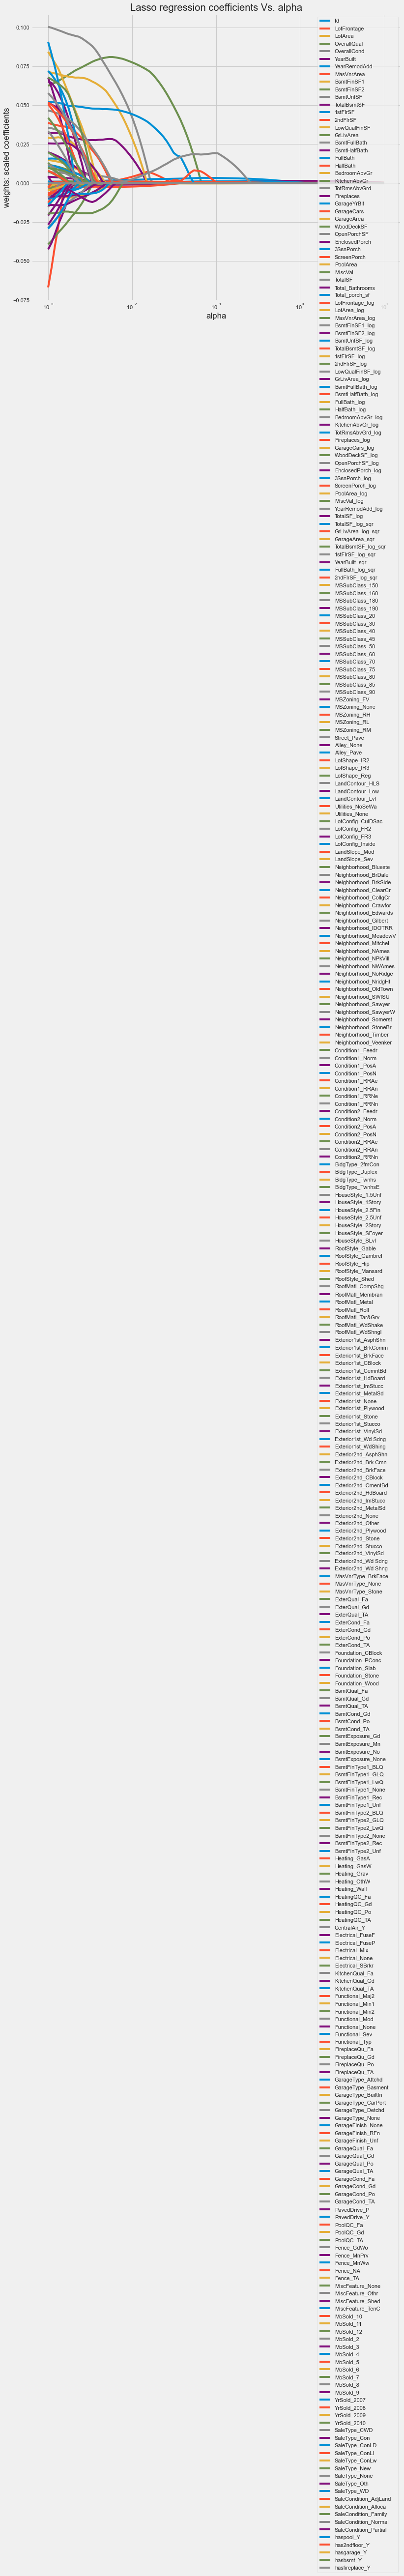

In [49]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(Xd_train.columns)

plt.show()

In [50]:
# Elastic Net Regression
alpha_elasticnet = 10**np.linspace(-3,2,100)
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(Xd_train, yd_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 335)

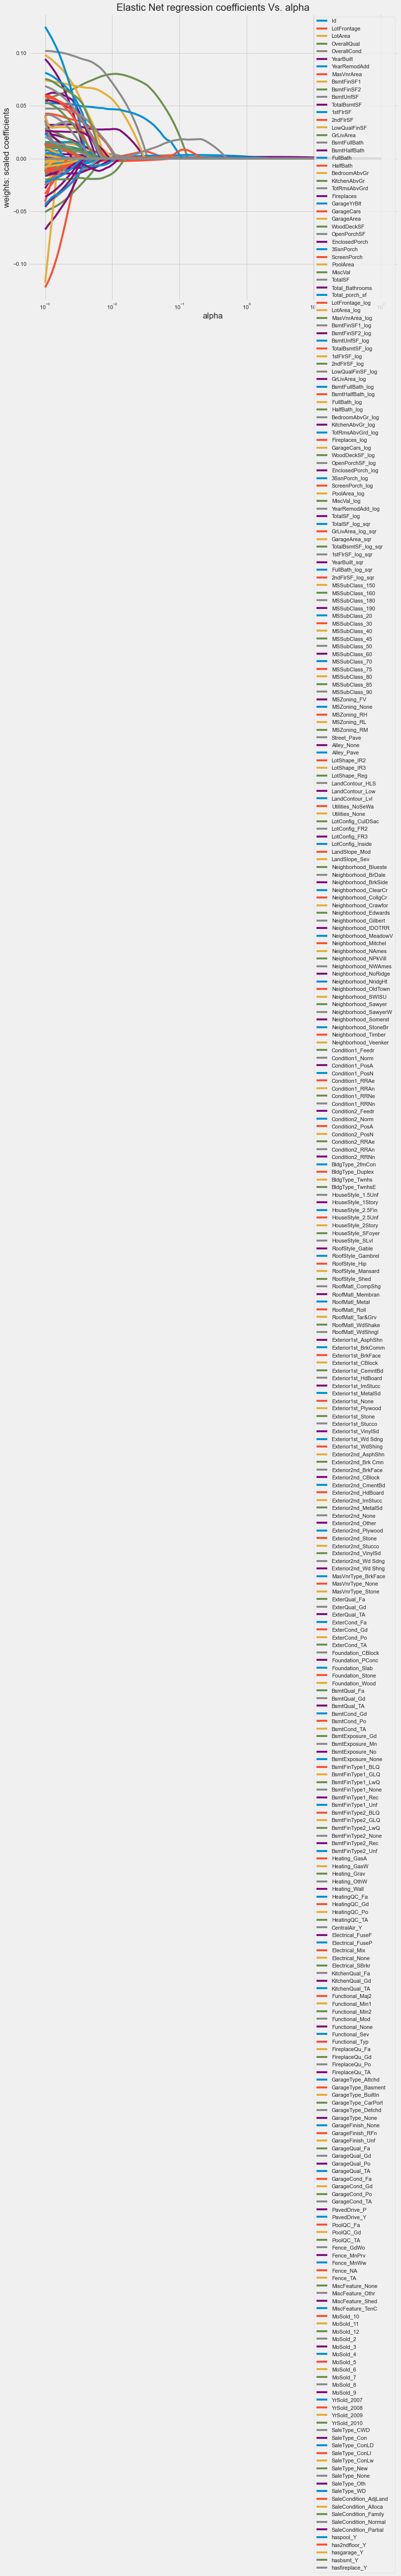

In [51]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(Xd_train.columns)

plt.show()

### 3. cross validation

In [52]:
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=rand_state)
folds = KFold(n_splits = 5, shuffle = True, random_state = rand_state)

In [53]:
%%time

lm = LinearRegression()

lm_params = [{'n_features_to_select': list(range(250, 265))}]

lm.fit(Xd_train, yd_train)
rfe = RFE(lm)             

lm_search = GridSearchCV(estimator = rfe, 
                        param_grid = lm_params, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2',
                        cv = 3, 
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
lm_result = lm_search.fit(Xd_train, yd_train) 

# summarize result
print('Train R^2 Score : %.3f'%lm_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%lm_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%lm_result.best_score_)
print('Best Parameters : ',lm_result.best_params_)
print('Training mse : ',mean_squared_error(yd_train,lm_search.predict(Xd_train)))
print('Testing mse : ',mean_squared_error(yd_test,lm_search.predict(Xd_test)))

# Best Parameters :  {'n_features_to_select': 251}
# lm_search=RFE(estimator=LinearRegression(), n_features_to_select=259)

# Train R^2 Score : -18960790010345.812
# Test R^2 Score : -17902842798292.410
# Best R^2 Score Through Grid Search : -347268.774
# Best Parameters :  {'n_features_to_select': 259}
# Training mse :  2.6736380960458675e-06
# Testing mse :  421047.9789461248
# CPU times: user 10.2 s, sys: 6.73 s, total: 16.9 s
# Wall time: 1min 18s

Train R^2 Score : -671845808297423.375
Test R^2 Score : -622613237459783.000
Best R^2 Score Through Grid Search : -9474.791
Best Parameters :  {'n_features_to_select': 261}
Training mse :  0.007831462324661666
Testing mse :  255049.7365693079
Wall time: 38.9 s


In [54]:
%%time

# lasso_alphas = [1e-5, 3e-4, 5e-4, 7e-4, 1e-4]
lasso_param = {
    'alpha':[1e-4,5e-4,1e-3]
       }

# define search
lasso_search = GridSearchCV(Lasso(), lasso_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
lasso_result = lasso_search.fit(Xd_sc_train, yd_train)

# summarize result
# print('Best Score: %s' % lasso_result.best_score_)
# print('Best Hyperparameters: %s' % lasso_result.best_params_)

print('Train R^2 Score : %.3f'%lasso_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%lasso_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%lasso_result.best_score_)
print('Best Parameters : ',lasso_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,lasso_search.predict(Xd_sc_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,lasso_search.predict(Xd_sc_test)),4))

# Best Parameters :  {'alpha': 0.0001}
# lasso_search=Lasso(alpha=0.0001)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.994
# Best R^2 Score Through Grid Search : 1.000
# Best Parameters :  {'alpha': 0.0001}
# Training mse :  0.0
# Testing mse :  0.0003
# CPU times: user 571 ms, sys: 290 ms, total: 861 ms
# Wall time: 1.7 s

Train R^2 Score : 0.942
Test R^2 Score : 0.923
Best R^2 Score Through Grid Search : 0.848
Best Parameters :  {'alpha': 0.001}
Training mse :  0.0091
Testing mse :  0.0129
Wall time: 2.3 s


In [55]:
%%time

# ridge_alphas = [1, 3, 5, 10, 15, 18, 20]
# ridge_alphas = [1,3, 5, 10]

ridge_param = {
    'alpha':[3]
       }
# define search
ridge_search = GridSearchCV(Ridge(), ridge_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
ridge_result = ridge_search.fit(Xd_sc_train, yd_train)

print('Train R^2 Score : %.3f'%ridge_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%ridge_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%ridge_result.best_score_)
print('Best Parameters : ',ridge_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,ridge_search.predict(Xd_sc_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,ridge_search.predict(Xd_sc_test)),4))

# Best Parameters :  {'alpha': 3}
# ridge_search=Ridge(alpha=3)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.993
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'alpha': 3}
# Training mse :  0.0
# Testing mse :  0.0003
# CPU times: user 144 ms, sys: 71.5 ms, total: 215 ms
# Wall time: 294 ms

Train R^2 Score : 0.951
Test R^2 Score : 0.911
Best R^2 Score Through Grid Search : 0.828
Best Parameters :  {'alpha': 3}
Training mse :  0.0077
Testing mse :  0.0149
Wall time: 199 ms


In [56]:
%%time

# net_alphas = [1e-4, 7e-3, 5e-3, 3e-3, 1e-3, 5e-2, 1e-2, 0.1]
# net_alphas = [1e-4, 5e-3, 1e-3, 1e-2]
# net_ratios = np.arange(0, 1, 0.1)
net_param = {
    'alpha':[1e-4],
    'l1_ratio':[0.5]
       }

# define search
net_search = GridSearchCV(ElasticNet(), net_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
net_result = net_search.fit(Xd_sc_train, yd_train)

print('Train R^2 Score : %.3f'%net_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%net_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%net_result.best_score_)
print('Best Parameters : ',net_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,net_search.predict(Xd_sc_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,net_search.predict(Xd_sc_test)),4))

# Best Parameters :  {'alpha': 0.0001, 'l1_ratio': 0.5}
# net_search=ElasticNet(alpha=0.0001, l1_ratio=0.5)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.994
# Best R^2 Score Through Grid Search : 1.000
# Best Parameters :  {'alpha': 0.0001, 'l1_ratio': 0.5}
# Training mse :  0.0
# Testing mse :  0.0003
# CPU times: user 1.32 s, sys: 321 ms, total: 1.64 s
# Wall time: 9.07 s


Train R^2 Score : 0.952
Test R^2 Score : 0.907
Best R^2 Score Through Grid Search : 0.789
Best Parameters :  {'alpha': 0.0001, 'l1_ratio': 0.5}
Training mse :  0.0076
Testing mse :  0.0155
Wall time: 1.23 s


## PCA Analysis

### 1. scale the features

In [57]:
n_comp=198
pca=PCA(n_components=n_comp)

Xd_reduced_train = pca.fit_transform(Xd_train)
Xd_reduced_test = pca.transform(Xd_test)

Xd_sc_reduced_train = sc.fit_transform(Xd_reduced_train)
Xd_sc_reduced_test = sc.fit_transform(Xd_reduced_test)


test_dummy=np.nan_to_num(test_dummy)
test_reduced=pca.transform(test_dummy)
test_sc_reduced=sc.fit_transform(test_reduced)

### 2. proportion variance explained - Scree plot

In [58]:
pca.fit(Xd_sc_train)

PCA(n_components=198)

In [59]:
scores = pca.fit_transform(Xd_sc_train)
PVE=pd.DataFrame({'Principal Component':range(1,pca.n_components+1), 'PVE':pca.explained_variance_ratio_ })
PVE['cum_PVE']= np.cumsum(PVE['PVE'])
PVE.head(150)

Principal Component       PVE   cum_PVE
0                      1  0.082620  0.082620
1                      2  0.037697  0.120317
2                      3  0.032056  0.152373
3                      4  0.026685  0.179057
4                      5  0.022724  0.201781
..                   ...       ...       ...
145                  146  0.001991  0.909497
146                  147  0.001975  0.911473
147                  148  0.001932  0.913405
148                  149  0.001901  0.915306
149                  150  0.001869  0.917176

[150 rows x 3 columns]

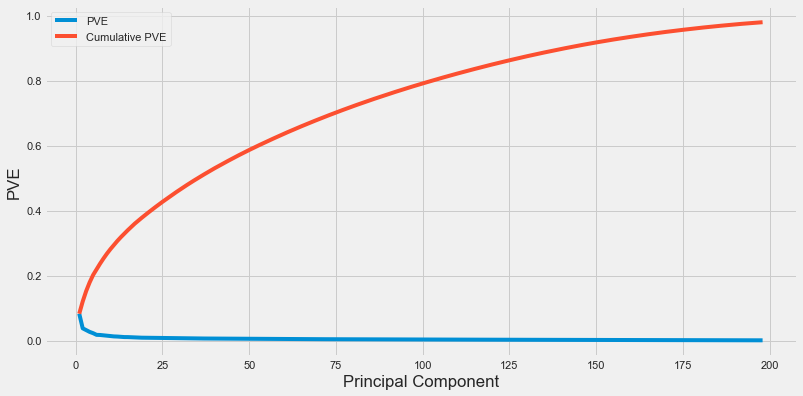

In [60]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Principal Component', y='PVE', data=PVE)
sns.lineplot(x='Principal Component', y='cum_PVE', data=PVE)
plt.legend(['PVE','Cumulative PVE'])
plt.show()

### 3. check the best number of pricinpal components

In [61]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 8.26, 12.03, 15.24, 17.91, 20.18, 21.94, 23.66, 25.27, 26.77,
       28.15, 29.43, 30.67, 31.82, 32.9 , 33.97, 34.99, 35.97, 36.87,
       37.76, 38.63, 39.46, 40.29, 41.1 , 41.9 , 42.68, 43.44, 44.2 ,
       44.95, 45.69, 46.41, 47.12, 47.81, 48.5 , 49.17, 49.83, 50.48,
       51.12, 51.75, 52.37, 52.99, 53.58, 54.17, 54.75, 55.33, 55.9 ,
       56.46, 57.01, 57.56, 58.1 , 58.63, 59.16, 59.68, 60.18, 60.68,
       61.18, 61.67, 62.16, 62.64, 63.12, 63.6 , 64.07, 64.53, 64.99,
       65.44, 65.89, 66.33, 66.77, 67.2 , 67.63, 68.06, 68.48, 68.9 ,
       69.31, 69.72, 70.13, 70.53, 70.93, 71.32, 71.71, 72.1 , 72.48,
       72.86, 73.24, 73.61, 73.98, 74.34, 74.7 , 75.06, 75.42, 75.77,
       76.12, 76.46, 76.8 , 77.14, 77.48, 77.81, 78.14, 78.47, 78.79,
       79.11, 79.43, 79.74, 80.05, 80.36, 80.67, 80.97, 81.27, 81.57,
       81.86, 82.15, 82.44, 82.73, 83.01, 83.29, 83.57, 83.85, 84.12,
       84.39, 84.66, 84.93, 85.19, 85.45, 85.71, 85.97, 86.23, 86.48,
       86.73, 86.98,

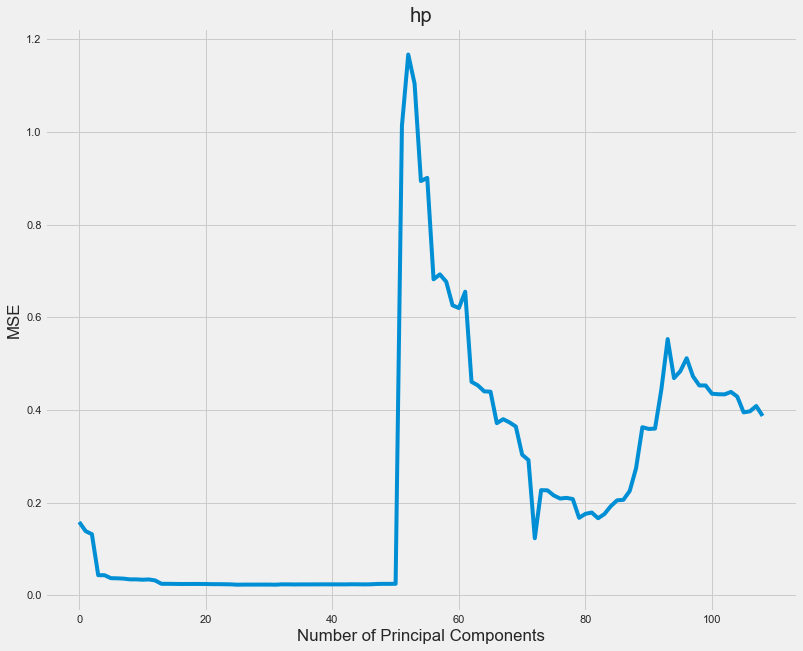

In [62]:

# Calculate MSE using cross-validation, adding one component at a time

regr = LinearRegression()
mse = []

for i in np.arange(1, 110):
    score = -1*cross_val_score(regr,
               Xd_sc_train[:,:i], yd_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

fig = plt.figure(figsize=(12,10))
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')
plt.show()

### 4. fitting regression models

In [63]:
pd.DataFrame(mse)[:100] 

0
0   0.158005
1   0.138394
2   0.131723
3   0.043239
4   0.043196
5   0.036767
6   0.036442
7   0.035809
8   0.034205
9   0.034208
10  0.033449
11  0.034030
12  0.031851
13  0.024569
14  0.024588
15  0.024388
16  0.024211
17  0.024224
18  0.024302
19  0.024243
20  0.024168
21  0.023845
22  0.023850
23  0.023641
24  0.023393
25  0.022655
26  0.022896
27  0.022873
28  0.022925
29  0.022922
30  0.022950
31  0.022659
32  0.023463
33  0.023440
34  0.023187
35  0.023368
36  0.023323
37  0.023384
38  0.023433
39  0.023484
40  0.023410
41  0.023438
42  0.023377
43  0.023627
44  0.023562
45  0.023386
46  0.023545
47  0.024255
48  0.024504
49  0.024461
50  0.024652
51  1.013237
52  1.167146
53  1.104076
54  0.893958
55  0.900988
56  0.681977
57  0.692576
58  0.676651
59  0.625752
60  0.619899
61  0.655188
62  0.460541
63  0.452950
64  0.440058
65  0.439322
66  0.371358
67  0.379974
68  0.373114
69  0.364115
70  0.303337
71  0.291666
72  0.122972
73  0.226825
74  0.226358
75  0.215313
76  0.208690
77  0.210114
78  0.207623
79  0.166992
80  0.175659
81  0.178457
82  0.166156
83  0.175218
84  0.192053
85  0.204782
86  0.205900
87  0.225053
88  0.273955
89  0.362717
90  0.358929
91  0.359673
92  0.444005
93  0.552895
94  0.468624
95  0.483570
96  0.511535
97  0.472441
98  0.452816
99  0.452785

In [64]:
pca=PCA(n_components=33)

Xd_reduced_train = pca.fit_transform(Xd_train)
Xd_reduced_test = pca.transform(Xd_test)

#train PCR model on training data 
regr = LinearRegression()
regr.fit(Xd_reduced_train, yd_train)

#calculate RMSE
from sklearn.metrics import mean_squared_error
yd_hat = regr.predict(Xd_reduced_test)
print(regr.score(Xd_reduced_train, yd_train))
print(np.sqrt(mean_squared_error(yd_test, yd_hat)))

# 0.9111533949142595
# 0.12610150629654754

0.8630502032380846
0.13230656928073964


In [65]:
n_comp=250
pca=PCA(n_components=n_comp)

Xd_reduced_train = pca.fit_transform(Xd_train)
Xd_reduced_test = pca.transform(Xd_test)

Xd_sc_reduced_train = sc.fit_transform(Xd_reduced_train)
Xd_sc_reduced_test = sc.fit_transform(Xd_reduced_test)

test_dummy=np.nan_to_num(test_dummy)
test_reduced=pca.transform(test_dummy)
test_sc_reduced=sc.fit_transform(test_reduced)

In [66]:
%%time



# pca_lm_params = [{'n_features_to_select': list(range(30, n_comp))}]

pca_lm_params = [{'n_features_to_select': list(range(180, n_comp))}]

pca_lm = LinearRegression()
pca_lm.fit(Xd_reduced_train, yd_train)
pca_rfe = RFE(pca_lm)            

pca_lm_search = GridSearchCV(estimator = pca_rfe, 
                        param_grid = pca_lm_params, 
                        scoring='r2',
                        cv = 3, 
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
pca_lm_result = pca_lm_search.fit(Xd_reduced_train, yd_train) 


# summarize result
# print('Best Score: %s' % lm_result.best_score_)
# print('Best Hyperparameters: %s' % lm_result.best_params_)

print('Train R^2 Score : %.3f'%pca_lm_result.best_estimator_.score(Xd_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%pca_lm_result.best_estimator_.score(Xd_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%pca_lm_result.best_score_)
print('Best Parameters : ',pca_lm_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,pca_lm_search.predict(Xd_reduced_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,pca_lm_search.predict(Xd_reduced_test)),4))

# {'n_features_to_select': 198}
# pca_lm_search=RFE(LinearRegression(),n_features_to_select=197)

# Train R^2 Score : 0.639
# Test R^2 Score : 0.617
# Best R^2 Score Through Grid Search : 0.519
# Best Parameters :  {'n_features_to_select': 197}
# Training mse :  0.0153
# Testing mse :  0.0171
# CPU times: user 4.64 s, sys: 1.45 s, total: 6.09 s
# Wall time: 2min 55s


Train R^2 Score : 0.160
Test R^2 Score : 0.108
Best R^2 Score Through Grid Search : -4.662
Best Parameters :  {'n_features_to_select': 181}
Training mse :  0.1323
Testing mse :  0.1485
Wall time: 42.3 s


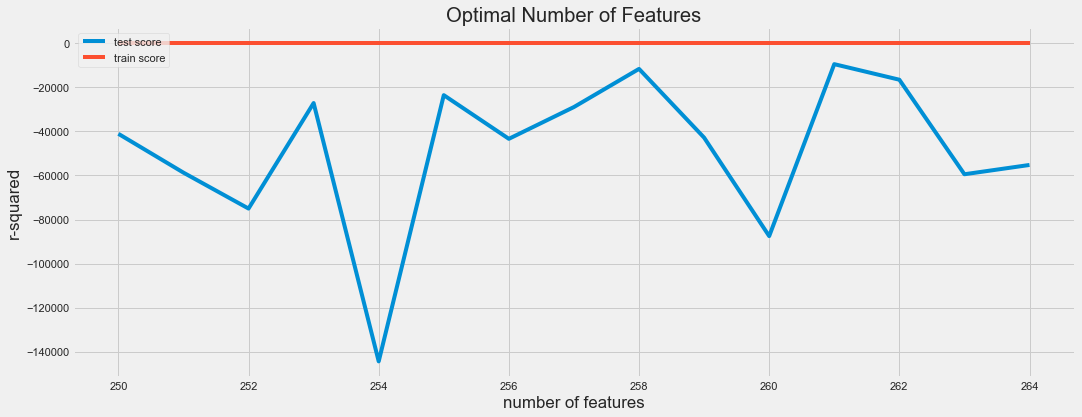

In [67]:
# plotting cv results
cv_results = pd.DataFrame(lm_result.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_r2"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_r2"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [68]:
%%time

# pca_lasso_alphas = [1e-5, 5e-5, 1e-4, 5e-4, 1e-4, 7e-3, 
#                 5e-3, 3e-3, 1e-3, 5e-2, 1e-2]
# pca_lasso_alphas = [1e-6, 3e-6, 5e-6, 7e-6, 1e-5, 5e-5]
pca_lasso_param = {
    'alpha':[1e-5]
       }

# define search
pca_lasso_search = GridSearchCV(Lasso(), pca_lasso_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
pca_lasso_result = pca_lasso_search.fit(Xd_sc_reduced_train, yd_train)

print('Train R^2 Score : %.3f'%pca_lasso_result.best_estimator_.score(Xd_sc_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%pca_lasso_result.best_estimator_.score(Xd_sc_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%pca_lasso_result.best_score_)
print('Best Parameters : ',pca_lasso_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,pca_lasso_search.predict(Xd_sc_reduced_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,pca_lasso_search.predict(Xd_sc_reduced_test)),4))

# pca_lasso_search=Lasso(alpha=1e-5)

# Train R^2 Score : 0.999
# Test R^2 Score : 0.987
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'alpha': 1e-05}
# Training mse :  0.0
# Testing mse :  0.0006
# CPU times: user 161 ms, sys: 42.9 ms, total: 204 ms
# Wall time: 295 ms

Train R^2 Score : 0.941
Test R^2 Score : 0.913
Best R^2 Score Through Grid Search : 0.784
Best Parameters :  {'alpha': 1e-05}
Training mse :  0.0093
Testing mse :  0.0145
Wall time: 273 ms


In [69]:
%%time

# pca_ridge_alphas = [0.1, 0.3, 1, 3, 5, 10, 
#                 15, 18, 20, 30]


# pca_ridge_param = {
#     'alpha':[5, 10, 20, 30, 40, 50, 70]
#        }


pca_ridge_param = {
    'alpha':[5]
       }


# define search
pca_ridge_search = GridSearchCV(Ridge(), pca_ridge_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
pca_ridge_result = pca_ridge_search.fit(Xd_sc_reduced_train, yd_train)

# summarize result
print('Train R^2 Score : %.3f'%pca_ridge_result.best_estimator_.score(Xd_sc_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%pca_ridge_result.best_estimator_.score(Xd_sc_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%pca_ridge_result.best_score_)
print('Best Parameters : ',pca_ridge_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,pca_ridge_search.predict(Xd_sc_reduced_train)),4))
print('Testing mse : ', round(mean_squared_error(yd_test,pca_ridge_search.predict(Xd_sc_reduced_test)),4))

# pca_ridge_search=Ridge(alpha=5)

# Train R^2 Score : 0.999
# Test R^2 Score : 0.987
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'alpha': 5}
# Training mse :  0.0
# Testing mse :  0.0006
# CPU times: user 225 ms, sys: 98.4 ms, total: 323 ms
# Wall time: 352 ms


Train R^2 Score : 0.941
Test R^2 Score : 0.913
Best R^2 Score Through Grid Search : 0.803
Best Parameters :  {'alpha': 5}
Training mse :  0.0093
Testing mse :  0.0145
Wall time: 164 ms


In [70]:
%%time

# pca_net_alphas = [5e-3, 3e-3, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1]

# pca_net_param = {
#     'alpha':[1e-3, 5e-2, 1e-2, 0.1, 1],
#     'l1_ratio':np.arange(0, 1, 0.1)
#        }


pca_net_param = {
    'alpha':[1e-3],
    'l1_ratio':[0]
       }

# define search
pca_net_search = GridSearchCV(ElasticNet(), pca_net_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
pca_net_result = pca_net_search.fit(Xd_sc_reduced_train, yd_train)

# summarize result
print('Train R^2 Score : %.3f'%pca_net_result.best_estimator_.score(Xd_sc_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%pca_net_result.best_estimator_.score(Xd_sc_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%pca_net_result.best_score_)
print('Best Parameters : ',pca_net_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,pca_net_search.predict(Xd_sc_reduced_train)),4))
print('Testing mse : ', round(mean_squared_error(yd_test,pca_net_search.predict(Xd_sc_reduced_test)),4))

# pca_net_search=ElasticNet(alpha=0.001,
#                          l1_ratio=0)

# Train R^2 Score : 0.999
# Test R^2 Score : 0.987
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'alpha': 0.001, 'l1_ratio': 0.0}
# Training mse :  0.0
# Testing mse :  0.0006
# CPU times: user 1.54 s, sys: 649 ms, total: 2.19 s
# Wall time: 3.53 s

Train R^2 Score : 0.941
Test R^2 Score : 0.913
Best R^2 Score Through Grid Search : 0.786
Best Parameters :  {'alpha': 0.001, 'l1_ratio': 0}
Training mse :  0.0093
Testing mse :  0.0145
Wall time: 997 ms


## KNN Regression

In [71]:
from sklearn.neighbors import KNeighborsRegressor

RMSE_CV=[]
RMSE_test = []
K=[]

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(Xd_reduced_train, yd_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, 
                                                X = Xd_reduced_train, 
                                                y = yd_train, cv = 10 , 
                                        scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(yd_test - 
                                               KNN_i.predict(Xd_reduced_test)))))
    K.append(i)
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 
                          'RMSE_test':np.round(RMSE_test,2),
                         'k':K} 
                         )

In [72]:
optimal_k.head(10)

RMSE_CV  RMSE_test   k
0     0.32       0.34   1
1     0.29       0.30   2
2     0.29       0.28   3
3     0.29       0.28   4
4     0.29       0.28   5
5     0.29       0.28   6
6     0.29       0.28   7
7     0.29       0.27   8
8     0.29       0.27   9
9     0.29       0.27  10

In [73]:
# the optimal k
opt_k=optimal_k.iloc[np.argmin(optimal_k['RMSE_CV']),2]
opt_k

2

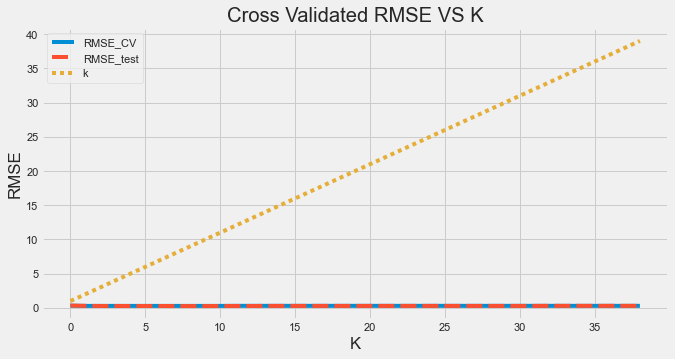

In [74]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [75]:
KNN_regression = KNeighborsRegressor(n_neighbors=opt_k)
KNN_regression.fit(Xd_reduced_train, yd_train)

# Predicting the Test set results
yd_hat = KNN_regression.predict(Xd_reduced_test)

predictions = pd.DataFrame({ 'y_test':yd_test,'y_hat':yd_hat})
predictions.head()

y_test      y_hat
107   11.652696  11.771258
33    12.016733  11.880748
1197  11.877576  11.884401
1042  12.185875  12.176833
625   11.982935  11.808698

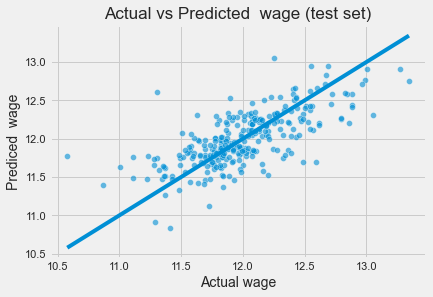

In [76]:
sns.scatterplot(x=yd_test, y=yd_hat, alpha=0.6)
sns.lineplot(yd_test, yd_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [77]:
KNN_regression.score(Xd_reduced_train, yd_train)

0.8386182138602252

In [78]:
%%time

knn_param = [{'n_neighbors': [2], 
              'weights': ['distance']}]


# knn_param = [{'n_neighbors': [2], 
#               'weights': ['distance']}]

knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid= knn_param, 
             refit = True, verbose=3, cv=folds )

knn_result = knn_search.fit(Xd_sc_reduced_train,yd_train)


print('Train R^2 Score : %.3f'%knn_result.best_estimator_.score(Xd_sc_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%knn_result.best_estimator_.score(Xd_sc_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%knn_result.best_score_)
print('Best Parameters : ',knn_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,knn_search.predict(Xd_sc_reduced_train)),4))
print('Testing mse : ', round(mean_squared_error(yd_test,knn_search.predict(Xd_sc_reduced_test)),4))

# knn_search=KNeighborsRegressor(n_neighbors=2,
#                               weights='distance')

# Train R^2 Score : 1.000
# Test R^2 Score : 0.338
# Best R^2 Score Through Grid Search : 0.269
# Best Parameters :  {'n_neighbors': 2, 'weights': 'distance'}
# Training mse :  0.0
# Testing mse :  0.0296
# CPU times: user 1.71 s, sys: 1.21 s, total: 2.92 s
# Wall time: 740 ms

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.350 total time=   0.0s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.037 total time=   0.0s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.244 total time=   0.0s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.196 total time=   0.0s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.232 total time=   0.0s
Train R^2 Score : 1.000
Test R^2 Score : 0.386
Best R^2 Score Through Grid Search : 0.212
Best Parameters :  {'n_neighbors': 2, 'weights': 'distance'}
Training mse :  0.0
Testing mse :  0.1021
Wall time: 154 ms


## SVR 

In [79]:
%%time

# svr_param = {'C': [0.1, 0.5, 1, 1.5, 2], 
#                  'gamma': [0.01, 0.001, 0.0003, 0.0005,0.0007, 0.0001], 
#                  'kernel': ['poly', 'rbf', 'sigmoid']} 
# svr_param = {'C': [0.1, 0.5, 1, 5], 
#                  'gamma': [0.001, 0.0003, 0.0005,0.0001], 
#                  'kernel': ['rbf']} 

# svr_param = {'C': [0.1, 0.5, 1, 5], 
#                  'gamma': [0.0001, 0.00005, 0.00001], 
#                  'kernel': ['rbf']} 

svr_param = {'C': [8], 
                 'gamma': [0.00005], 
                 'kernel': ['rbf']} 

svr_search = GridSearchCV(estimator=SVR(), param_grid= svr_param, 
             refit = True, verbose=3, cv=folds )

svr_result = svr_search.fit(Xd_sc_train,yd_train)

print('Train R^2 Score : %.3f'%svr_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%svr_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%svr_result.best_score_)
print('Best Parameters : ',svr_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,svr_search.predict(Xd_sc_train)),4))
print('Testing mse : ', round(mean_squared_error(yd_test,svr_search.predict(Xd_sc_test)),4))

# Best Parameters :  {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
# svr_search=SVR(C=5,
#               gamma=5e-05,
#               kernel='rbf')

# Train R^2 Score : 0.923
# Test R^2 Score : 0.930
# Best R^2 Score Through Grid Search : 0.884
# Best Parameters :  {'C': 5, 'gamma': 5e-05, 'kernel': 'rbf'}
# Training mse :  0.0032
# Testing mse :  0.0031
# CPU times: user 3.3 s, sys: 7.97 ms, total: 3.3 s
# Wall time: 3.27 s

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.818 total time=   0.0s
[CV 2/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.888 total time=   0.0s
[CV 3/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.916 total time=   0.0s
[CV 4/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.890 total time=   0.0s
[CV 5/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.874 total time=   0.0s
Train R^2 Score : 0.918
Test R^2 Score : 0.920
Best R^2 Score Through Grid Search : 0.877
Best Parameters :  {'C': 8, 'gamma': 5e-05, 'kernel': 'rbf'}
Training mse :  0.0129
Testing mse :  0.0134
Wall time: 885 ms


In [80]:
yd_hat_optimized = svr_result.predict(Xd_sc_test)

In [81]:
predictions['y_hat_optimized'] = yd_hat_optimized
predictions.head()

y_test      y_hat  y_hat_optimized
107   11.652696  11.771258        11.525417
33    12.016733  11.880748        12.125453
1197  11.877576  11.884401        11.867750
1042  12.185875  12.176833        12.279240
625   11.982935  11.808698        11.945540

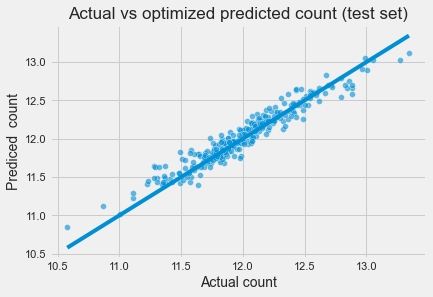

In [82]:
sns.scatterplot(x=yd_test, y=yd_hat_optimized, alpha=0.6)
sns.lineplot(yd_test, yd_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

In [83]:
svr_result.score(Xd_sc_test, yd_test)

0.9196304986364757

In [84]:
svr_result.score(Xd_sc_train, yd_train)

0.9178214220669824

In [85]:
MSE_test_opt = round(np.mean(np.square(y_test - yd_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.1

## Decision Tree

In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_lb_train = X_train.apply(le.fit_transform)
X_lb_test = X_test.apply(le.fit_transform)

In [87]:
from sklearn.tree import DecisionTreeRegressor
# Fitting regression tree to the Training set

Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_lb_train, y_train)

# Predicting the Test set results
y_hat = Tree_regressor.predict(X_lb_test)

predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

y_test      y_hat
107   11.652696  11.289794
33    12.016733  12.016733
1197  11.877576  11.849405
1042  12.185875  11.767575
625   11.982935  11.608245

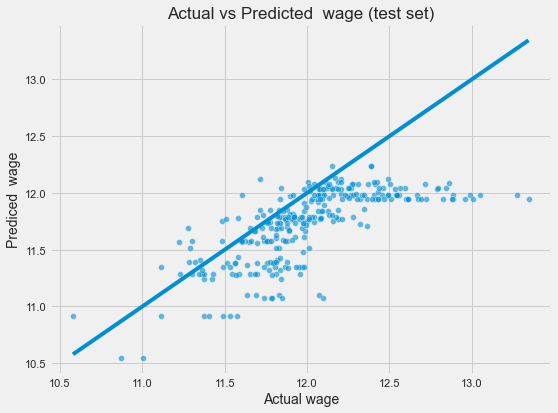

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [89]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.4

In [90]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_lb_train,y_train)
ccp_alphas = path.ccp_alphas

RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), 
                           X = X_lb_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

alpha  RMSE_CV
0  0.000000e+00  0.20295
1  4.866731e-17  0.20295
2  4.866731e-17  0.20295
3  4.866731e-17  0.20295
4  4.866731e-17  0.20295

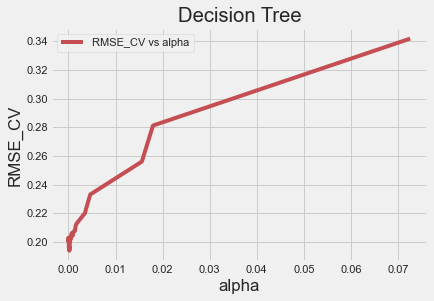

In [91]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.title('Decision Tree')
plt.show()

In [92]:
np.argmin(output['RMSE_CV'])

1059

In [93]:
output.iloc[np.argmin(output['RMSE_CV']),]

alpha      0.000178
RMSE_CV    0.193839
Name: 1059, dtype: float64

In [94]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

0.00017808052206413297

In [95]:
optimal_DT = DecisionTreeRegressor(max_depth=3, ccp_alpha=optimal_alpha)
optimal_DT.fit(X_lb_train, y_train)
y_hat_opt = optimal_DT.predict(X_lb_test)

In [96]:
optimal_DT.score(X_lb_train, y_train)

0.7582992825481112

In [97]:
optimal_DT.score(X_lb_test, y_test)

0.2156417214595635

In [98]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.36

In [99]:
%%time

dt_param = {  'bootstrap': [True], 
              'max_depth': [10], 
              'max_features': ['auto'], 
              'n_estimators': [300]}

dt_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = dt_param, 
                          cv = folds, n_jobs = 1, verbose = 0, return_train_score=True)

dt_result = dt_search.fit(X_lb_train,y_train)

print('Train R^2 Score : %.3f'%dt_result.best_estimator_.score(X_lb_train, y_train))
print('Test R^2 Score : %.3f'%dt_result.best_estimator_.score(X_lb_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%dt_result.best_score_)
print('Best Parameters : ',dt_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,dt_search.predict(X_lb_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,dt_search.predict(X_lb_test)),4))

# Train R^2 Score : 1.000
# Test R^2 Score : -0.990
# Best R^2 Score Through Grid Search : 1.000
# Best Parameters :  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}
# Training mse :  0.0
# Testing mse :  0.2612
# Wall time: 3min 22s

# dt_search=RandomForestRegressor(bootstrap=True,
#                                max_depth=10,
#                                max_features='auto',
#                                n_estimators=150)

Train R^2 Score : 0.978
Test R^2 Score : 0.217
Best R^2 Score Through Grid Search : 0.866
Best Parameters :  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}
Training mse :  0.0035
Testing mse :  0.1303
Wall time: 38.6 s


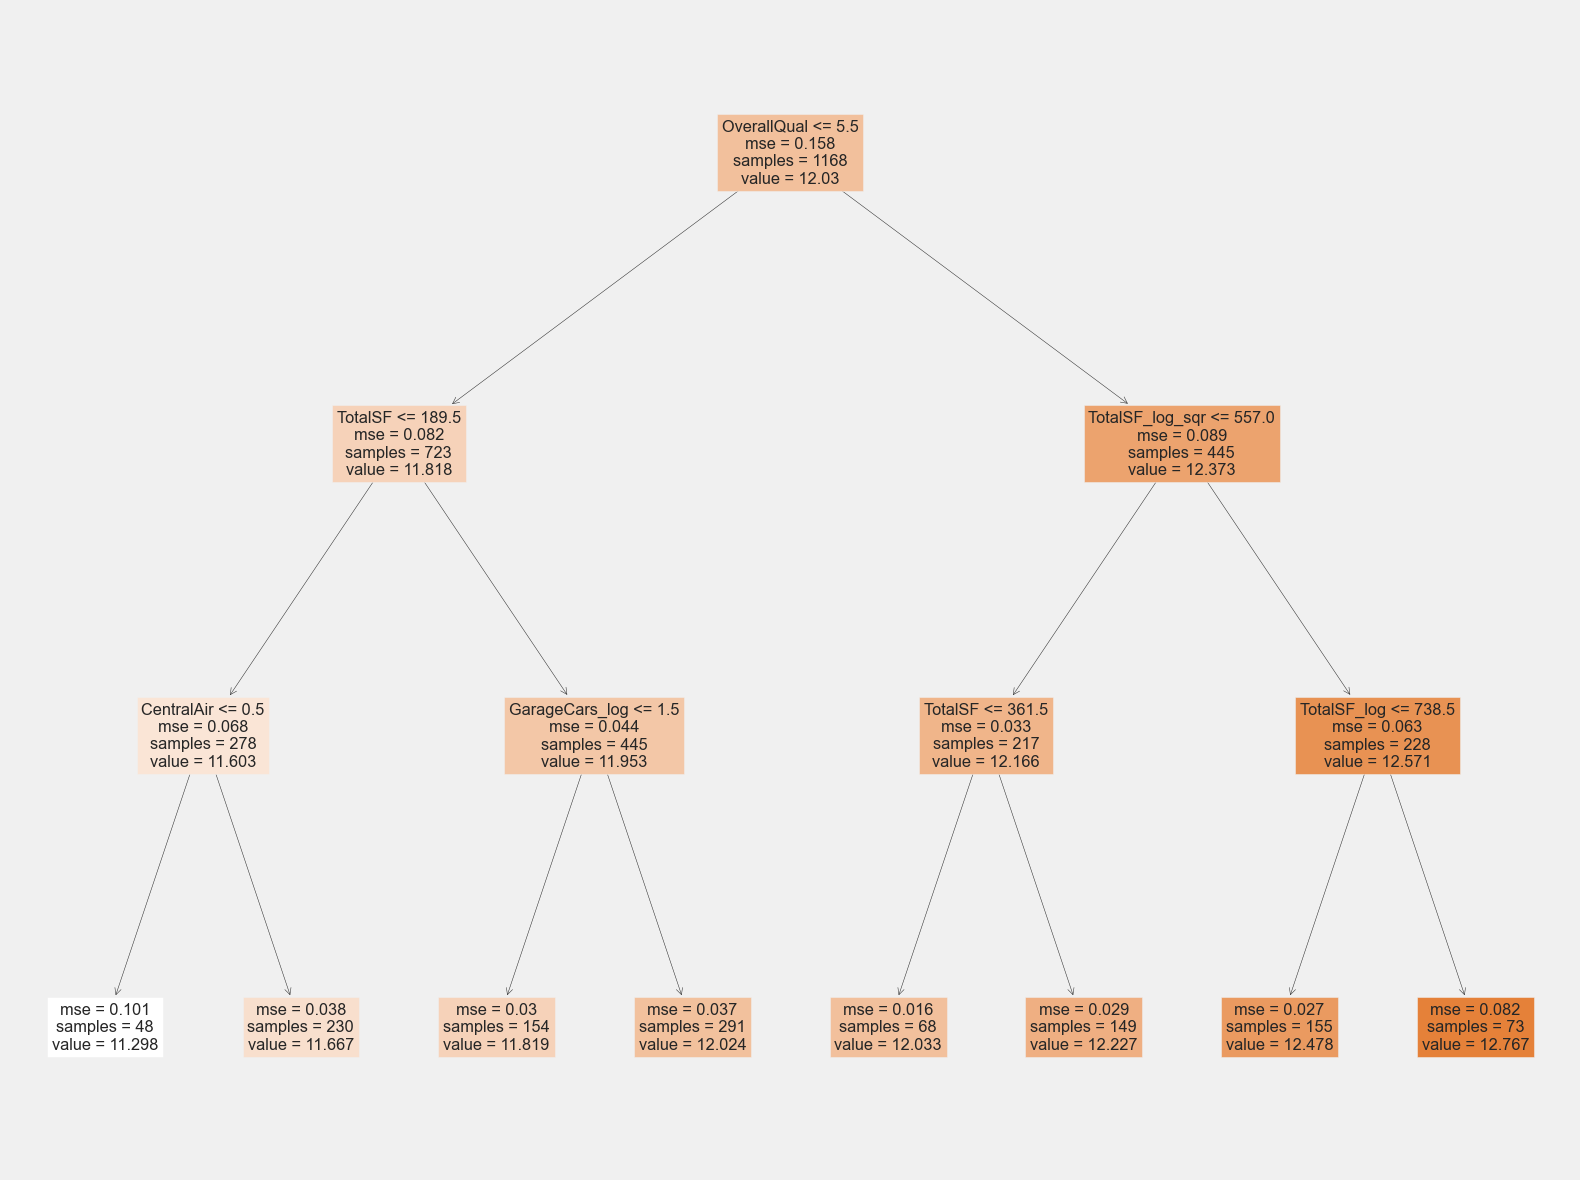

In [100]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
DT_plot = tree.plot_tree(optimal_DT, feature_names=X_lb_train.columns, filled=True)
# left branch True

In [101]:
train

Id MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature   MiscVal MoSold YrSold SaleType SaleCondition  SalePrice    TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  \
0        1         60       RL    10.481398  8.670457   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7     3.036931       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   19.340340        Gd        TA      PConc       Gd       TA           No          GLQ  118.098015          Unf    0.000000  30.319786   252.446438    GasA        Ex          Y      SBrkr  5.133687  1273.318734           0.0   7.744828      0.993848      0.000000         2  1.072004             3      0.717357          Gd      2.550030        Typ    0.000000          TA     Attchd       2003.0          RFn           2         548         TA         TA          Y    0.000000    12.049772       0.000000        0.0          0.0       0.0     TA     NA        None  0.000000      2   2008       WD        Normal  12.247699  19.635177              3.5       20.248951       N           Y         Y       Y            N   
1        2         20       RL    11.558196  8.787629   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6     4.241668       1976          1976     Gable  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA     CBlock       Gd       TA           Gd          ALQ  147.125761          Unf    0.000000  44.696310   342.556400    GasA        Ex          Y      SBrkr  5.348117     0.000000           0.0   7.416974      0.000000      0.682506         2  0.000000             3      0.717357          TA      2.219433        Typ    0.919485          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y   62.298514     0.000000       0.000000        0.0          0.0       0.0     TA     NA        None  0.000000      5   2007       WD        Normal  12.109016  19.551999              2.5       57.964037       N           N         Y       Y            Y   
2        3         60       RL    10.707933  8.933084   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7     3.036931       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   17.687638        Gd        TA      PConc       Gd       TA           Mn          GLQ   91.750448          Unf    0.000000  57.687342   267.178807    GasA        Ex          Y      SBrkr  5.174048  1292.445964           0.0   7.791848      0.993848      0.000000         2  1.072004             3      0.717357          Gd      2.219433        Typ    0.919485          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y    0.000000     9.878686       0.000000        0.0          0.0       0.0     TA     NA        None  0.000000      9   2008       WD        Normal  12.317171  19.904855              3.5       15.706164       N           Y         Y       Y            Y   
3   

## Random Forest

### 1. Encode ordinal categorical features as an integer array.


In [102]:
object_columns(X_train).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace'], dtype='object')

In [103]:

ordinal_categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
                       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
                       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 
                       'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']

enc = OrdinalEncoder()

X_ord_train=X_train.copy()
X_ord_test=X_test.copy()

X_ord_train[ordinal_categorical]= enc.fit_transform(X_train[ordinal_categorical])
X_ord_test[ordinal_categorical]= enc.fit_transform(X_test[ordinal_categorical])
X_ord_train.head()

test_ord=test.copy()
test_ord[ordinal_categorical]= enc.fit_transform(test[ordinal_categorical])


In [104]:
X_train.head()

Id MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature   MiscVal MoSold YrSold SaleType SaleCondition    TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  \
931    932         20       RL    10.855617  8.738527   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story            5     3.463892       1965          1965     Gable  CompShg     VinylSd     VinylSd       None    0.000000        TA        TA     CBlock       TA       TA           No          BLQ   71.718928          Rec   11.208874  26.570852   268.320268    GasA        Ex          Y      SBrkr  5.177072       0.0           0.0   7.082879      0.000000      0.682506         1       0.0             2      0.717357          TA      2.022026        Typ    0.000000          TA     Detchd       1965.0          Unf           1         429         TA         TA          Y    0.000000     0.000000            0.0        0.0          0.0       0.0     TA   GdWo        None  0.000000      7   2009       WD        Normal  18.038040              1.5        0.000000       N           N         Y       Y            N   
1436  1437         20       RL    10.089356  8.728380   Pave  None      Reg         Lvl    AllPub       FR2       Gtl        NAmes       Norm       Norm     1Fam     1Story            4     3.463892       1971          1971     Gable  CompShg     HdBoard     HdBoard       None    0.000000        TA        TA      PConc       TA       TA           No          ALQ  107.706307          Unf    0.000000  41.179038   254.300674    GasA        TA          Y      SBrkr  5.138907       0.0           0.0   7.009671      0.000000      0.000000         1       0.0             3      0.717357          TA      2.022026        Typ    0.000000          TA     Detchd       1974.0          Unf           2         528         TA         TA          Y    0.000000     0.000000            0.0        0.0          0.0       0.0     TA   GdWo        None  0.000000      5   2007       WD        Normal  17.718392              1.0        0.000000       N           N         Y       Y            N   
1214  1215         85       RL    10.782098  8.843702   Pave  None      IR1         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     SFoyer            5     3.036931       1962          1962     Gable  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA     CBlock       TA       TA           Av          BLQ  126.752320          Unf    0.000000  29.191226   268.320268    GasA        TA          Y      SBrkr  5.219864       0.0           0.0   7.165535      0.993848      0.000000         1       0.0             3      0.717357          TA      2.219433        Typ    0.000000          TA     Attchd       1962.0          Unf           1         300         TA         TA          Y   39.277941    13.140662            0.0        0.0          0.0       0.0     TA     NA        None  0.000000      5   2006       WD        Normal  18.223859              2.0       47.804586       N           N         Y       Y            N   
611    612         80       RL    11.558196  8.860621   Pave

In [105]:
X_ord_train.describe().T

count          mean            std           min           25%           50%           75%           max
Id                   1168.0  7.231661e+02     418.324251  1.000000e+00  3.627500e+02  7.215000e+02  1.082250e+03  1.460000e+03
MSSubClass           1168.0  6.280822e+00       3.559013  0.000000e+00  4.000000e+00  5.000000e+00  9.000000e+00  1.400000e+01
MSZoning             1168.0  3.017979e+00       0.624151  0.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  4.000000e+00
LotFrontage          1168.0  1.072744e+01       1.583136  5.958922e+00  1.008936e+01  1.085562e+01  1.155820e+01  2.129758e+01
LotArea              1168.0  8.739651e+00       0.472961  6.935833e+00  8.577702e+00  8.780189e+00  8.961156e+00  1.160099e+01
...                     ...           ...            ...           ...           ...           ...           ...           ...
TotalBsmtSF_log_sqr  1168.0  4.685278e+01       9.282606  0.000000e+00  4.463382e+01  4.778601e+01  5.142715e+01  7.600083e+01
1stFlrSF_log_sqr     1168.0  4.929867e+01       4.466552  3.506509e+01  4.605570e+01  4.898553e+01  5.254596e+01  7.146720e+01
YearBuilt_sqr        1168.0  3.888814e+06  117024.698129  3.515625e+06  3.818116e+06  3.892729e+06  4.000000e+06  4.040100e+06
FullBath_log_sqr     1168.0  9.017293e-01       0.394491  0.000000e+00  4.804530e-01  1.206949e+00  1.206949e+00  1.921812e+00
2ndFlrSF_log_sqr     1168.0  1.938029e+01      22.081410  0.000000e+00  0.000000e+00  0.000000e+00  4.349530e+01  5.826833e+01

[125 rows x 8 columns]

### 2. fit the model

In [106]:
from sklearn.ensemble import RandomForestRegressor

RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_ord_train, y_train)

# Predicting the Test set results
y_hat = RF_regression.predict(X_ord_test)
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

y_test      y_hat
107   11.652696  11.560124
33    12.016733  11.971153
1197  11.877576  11.993346
1042  12.185875  12.106205
625   11.982935  11.888898

### 3. Evaluating the model on test dataset¶

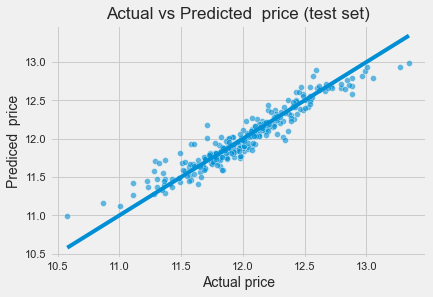

In [107]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs Predicted  price (test set)', fontsize=17)
plt.show()

In [108]:
np.round(RF_regression.score(X_ord_test, y_test),4)

0.901

In [109]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.14

### 4.Tuning hyperparameters: 
- GridSearch

In [110]:
ordinal_categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
                       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
                       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 
                       'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']

enc = OrdinalEncoder()

X_ord_train=X_train.copy()
X_ord_test=X_test.copy()

X_ord_train[ordinal_categorical]= enc.fit_transform(X_train[ordinal_categorical])
X_ord_test[ordinal_categorical]= enc.fit_transform(X_test[ordinal_categorical])
X_ord_train.head()

test_ord=test.copy()
test_ord[ordinal_categorical]= enc.fit_transform(test[ordinal_categorical])


In [111]:
%%time


# Best Parameters :  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}

# rf_param = {'n_estimators': [ 100,300,1000], 
#             'max_features':['sqrt','log2'], 
#             'max_depth':[20,25,35]}
# rf_param = {'n_estimators': [ 200,300,500], 
#             'max_features':['sqrt','log2'], 
#             'max_depth':[10, 15, 20]}

rf_param = {'n_estimators': [300], 
            'max_features':['sqrt'], 
            'max_depth':[20]}

rf_search = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),
                         param_grid= rf_param, refit = True, verbose=2, cv=folds )

rf_result = rf_search.fit(X_ord_train,y_train)

y_hat_optimized = rf_search.predict(X_ord_test)

print('Train R^2 Score : %.3f'%rf_search.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%rf_search.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%rf_search.best_score_)
print('Best Parameters : ',rf_search.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,rf_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,rf_search.predict(X_ord_test)),4))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   1.0s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   1.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   1.1s
Train R^2 Score : 0.981
Test R^2 Score : 0.908
Best R^2 Score Through Grid Search : 0.861
Best Parameters :  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
Training mse :  0.003
Testing mse :  0.0154
Wall time: 7.86 s


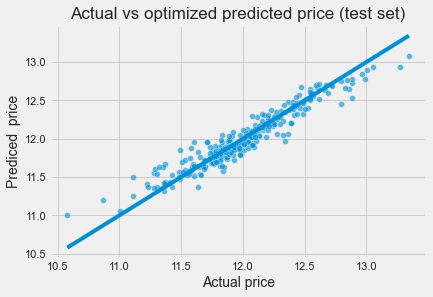

In [112]:
y_hat_optimized = rf_search.predict(X_ord_test)

predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
plt.show()

In [113]:
np.round(rf_result.score(X_ord_test, y_test),4)

0.9077

In [114]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.14

- Cross validation
We will use Cross validation to estimate performance metrics in the test set. 

In [115]:
NMSE = cross_val_score(estimator = RandomForestRegressor(max_depth=20, 
                                                         max_features='sqrt', n_estimators=500), 
                       X = X_ord_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.1497

### 5. Out-of-Bag errors!
We can show that on average, each bagged tree makes use of around 2/3 of the observations and 1/3 of them are not used to fit the model. These left out observations are called out-of-bag (OOB) observations. It turns out there is a very straightforward way to estimate the test errors using OOB observations. 

In [116]:
np.random.choice (100,size=100)
np.unique(np.random.choice (100,size=100)).size
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_ord_train, y_train)
RF_oob.oob_score_


0.8651154652521147

### 6. Feature Importance

In [117]:
features = list(X_ord_train.columns)
features

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [118]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_ord_train, y_train)

rf_importance = RF_Regressor.feature_importances_
rf_importance

array([2.80759978e-03, 2.56723433e-03, 3.84321995e-03, 5.49147829e-03,
       7.22227643e-03, 7.86612776e-05, 6.07374199e-04, 9.45450836e-04,
       9.90818905e-04, 4.79030523e-07, 5.97005471e-04, 4.84098654e-04,
       3.92295275e-03, 7.56227194e-04, 1.84423820e-04, 1.24161007e-03,
       1.30655637e-03, 6.67245878e-02, 6.48887595e-03, 3.52110561e-02,
       1.14571963e-02, 1.03511063e-03, 3.20703190e-04, 1.99085011e-03,
       1.99567449e-03, 7.59596669e-04, 2.38697429e-03, 2.52159823e-02,
       1.13112709e-03, 2.79287323e-03, 1.68289079e-02, 9.13080379e-04,
       1.35605891e-03, 1.87009461e-03, 7.18721592e-03, 5.24207299e-04,
       3.87297515e-04, 3.94467338e-03, 1.68948917e-02, 3.44034927e-04,
       3.45099022e-03, 5.98575663e-03, 5.29777325e-04, 1.30921318e-02,
       5.15630028e-03, 9.59093009e-05, 4.23866259e-02, 1.12403388e-03,
       2.07761203e-04, 1.27799430e-02, 1.18402275e-03, 1.67351006e-03,
       2.29457393e-03, 1.72121040e-02, 2.58380794e-03, 1.22951741e-03,
      

In [119]:
rf_FIM = pd.DataFrame({'Features': X_ord_train.columns , 'Feature_importance':rf_importance})
rf_FIM = rf_FIM.sort_values(by=['Feature_importance'], ascending=False)
rf_FIM

Features  Feature_importance
117    TotalSF_log_sqr        7.571483e-02
80             TotalSF        7.553496e-02
116        TotalSF_log        7.002518e-02
17         OverallQual        6.672459e-02
118  GrLivArea_log_sqr        4.395856e-02
..                 ...                 ...
5               Street        7.866128e-05
69           3SsnPorch        6.804278e-05
83             haspool        6.784065e-05
111      3SsnPorch_log        6.136305e-05
9            Utilities        4.790305e-07

[125 rows x 2 columns]

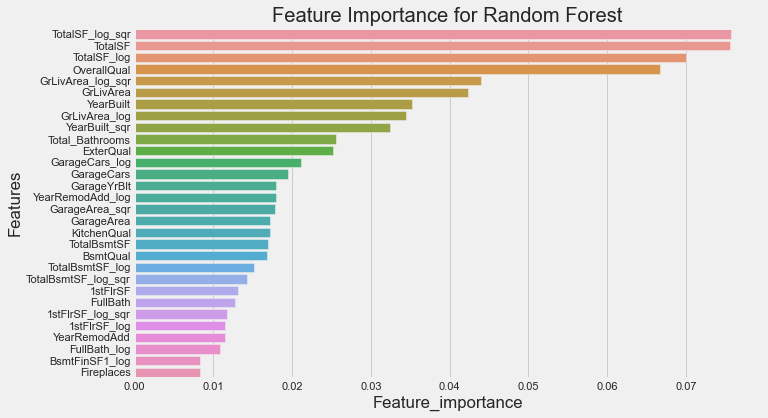

In [120]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance for Random Forest')
sns.barplot(y='Features', x='Feature_importance', data=rf_FIM.head(30))
plt.show()

### 8. Does more important feature mean more significant?

In [121]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_ord_test)
X_train_wc = sm.add_constant(X_ord_train)

# Fit the model
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()

statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     97.53
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:08:11   Log-Likelihood:                 896.56
No. Observations:                1168   AIC:                            -1545.
Df Residuals:                    1044   BIC:                            -917.3
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -491.9266    916.962     -0.536      0.592   -2291.226    1307.372
Id                   2.284e-06   8.84e-06      0.258      0.796   -1.51e-05    1.96e-05
MSSubClass              0.0002      0.002      0.101      0.919      -0.004       0.004
MSZoning               -0.0053      0.007     -0.734      0.463      -0.020       0.009
LotFrontage            -0.0096      0.025     -0.389      0.698      -0.058       0.039
LotArea                 0.1811      1.864      0.097      0.923      -3.476       3.838
Street                  0.1045      0.066      1.588      0.113      -0.025       0.234
Alley                   0.0307      0.017      1.785      0.075      -0.003       0.064
LotShape               -0.0019      0.003     -0.645      0.519      -0.008       0.004
LandContour            -0.0060      0.006     -0.987      0.324      -0.018       0.006
Utilities              -0.0968      0.128     -0.755      0.451      -0.348       0.155
LotConfig              -0.0035      0.002     -1.454      0.146      -0.008       0.001
LandSlope               0.0031      0.017      0.185      0.853      -0.030       0.036
Neighborhood           -0.0001      0.001     -0.205      0.837      -0.001       0.001
Condition1              0.0041      0.004      0.947      0.344      -0.004       0.013
Condition2             -0.0380      0.017     -2.261      0.024      -0.071      -0.005
BldgType                0.0057      0.006      1.011      0.312      -0.005       0.017
HouseStyle              0.0032      0.003      0.933      0.351      -0.004       0.010
OverallQual             0.0564      0.005     10.375      0.000       0.046       0.067
OverallCond             0.1102      0.011      9.964      0.000       0.089       0.132
YearBuilt              -0.0107      0.029     -0.368      0.713      -0.068       0.046
YearRemodAdd           -0.0256      0.071     -0.363      0.717      -0.164       0.113
RoofStyle               0.0017      0.005      0.329      0.742      -0.008       0.012
RoofMatl                0.0042      0.007      0.628      0.530      -0.009       0.017
Exterior1st            -0.0033      0.002     -1.421      0.156      -0.008       0.001
Exterior2nd             0.0031      0.002      1.343      0.180      -0.001       0.008
MasVnrType              0.0203      0.008      2.640      0.008       0.005       0.035
MasVnrArea              0.0210      0.015      1.376      0.169      -0.009       0.051
ExterQual              -0.0143      0.009     -1.596      0.111      -0.032       0.003
ExterCond               0.0079      0.005      1.460      0.145      -0.003       0.018
Foundation              0.0090      0.008      1.144      0.253      -0.006       0.024
BsmtQual               -0.0125      0.007     -1.867      0.062      -0.026       0.001
Bsm

## Gradient Boosting Regression

### 1. fit the model

In [122]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_ord_train, y_train)

y_hat = gbr.predict(X_ord_test)

print(y_hat[:15])
print(y_test[:15])

print('Test R^2 Score : %.3f'%gbr.score(X_ord_test, y_test))
print('Training R^2 Score : %.3f'%gbr.score(X_ord_train, y_train))

# Test R^2 Score : 0.909
# Training R^2 Score : 0.969

[11.47930724 11.97255252 11.88550375 12.12789688 11.92602385 11.84558837
 12.24497058 11.23682622 11.94719325 11.94444788 11.64024011 11.86127883
 12.28409417 11.54608534 12.16612193]
107     11.652696
33      12.016733
1197    11.877576
1042    12.185875
625     11.982935
1083    11.982935
621     12.388398
325     11.373675
1020    12.078245
1012    12.013707
51      11.648339
658     11.487618
446     12.154785
589     11.283525
447     12.205578
Name: SalePrice, dtype: float64
Test R^2 Score : 0.920
Training R^2 Score : 0.961


### 2. Attributes 

In [123]:
# import features in the dataset
print("Feature Importances : ", gbr.feature_importances_)

# trained estimators
gbr.estimators_[:2]

# Loss function as object
print("Loss : ", gbr.loss_)

Feature Importances :  [8.30464364e-04 1.77151377e-03 1.02687689e-02 1.93645837e-03
 7.03435838e-03 0.00000000e+00 6.51096544e-05 2.22445462e-04
 7.07125747e-04 0.00000000e+00 4.67365568e-04 3.20594867e-04
 4.68749095e-03 7.37530461e-04 0.00000000e+00 1.46958215e-05
 2.39081432e-04 3.44411435e-01 1.40044058e-02 1.59072794e-02
 1.22539496e-02 2.35940291e-04 0.00000000e+00 5.69264234e-04
 1.51172016e-04 2.12629372e-04 2.26413523e-04 2.11721147e-03
 6.35908477e-06 3.24827440e-04 3.09832719e-04 6.87926816e-04
 1.59431289e-03 1.30054269e-04 4.50511366e-03 0.00000000e+00
 3.62672818e-05 1.05339517e-03 1.10133315e-03 3.28241732e-04
 6.02262911e-04 1.64137517e-02 7.76161290e-05 3.54134404e-03
 1.64801531e-03 6.56698128e-05 3.17424189e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.79964345e-04
 4.28063294e-03 1.00457158e-02 0.00000000e+00 2.07041118e-03
 5.96560114e-03 1.88288616e-04 4.32449930e-03 5.28632808e-03
 0.00000000e+00 2.58445009e-03 3.57391872e-03 2.23347291e-06
 

### 3. tune hyperparameters

In [124]:
%%time

n_samples = X_ord_train.shape[0]
n_features = X_ord_train.shape[1]

# Best Parameters :  {'learning_rate': 0.005, 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 1500}
# n_estimators represents the number of trees in the forest.
# gbr_param={'n_estimators':[100,300,1500],
#             'learning_rate':[0.001, 0.005, 0.01],
#             'max_depth':[20, 30, 35],
#             'max_features':['sqrt', 'auto', 'log2']}
# gbr_param={'n_estimators':[1500, 2000, 3000],
#             'learning_rate':[0.001, 0.005, 0.01],
#             'max_depth':[20, 30, 35],
#             'max_features':['sqrt', 'auto', 'log2']}
# gbr_param={'n_estimators':[2000, 2500],
#             'learning_rate':[0.01, 0.05, 0.1, 1],
#             'max_depth':[10, 15, 20],
#             'max_features':['sqrt', 'auto', 'log2']}

gbr_param={'n_estimators':[2000],
            'learning_rate':[0.01],
            'max_depth':[15],
            'max_features':[ 'auto']}

# Best Parameters :  {'learning_rate': 0.01, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 2000}


gbr_search = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                          param_grid=gbr_param, n_jobs=-1, cv=folds, verbose=5)
gbr_result=gbr_search.fit(X_ord_train,y_train)

print('Train R^2 Score : %.3f'%gbr_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%gbr_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%gbr_result.best_score_)
print('Best Parameters : ',gbr_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,gbr_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,gbr_search.predict(X_ord_test)),4))

# Best Parameters :  {'learning_rate': 0.01, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 1500}
# gbr_search=GradientBoostingRegressor(learning_rate=0.01,
#                                     max_depth=20,
#                                     max_features='auto',
#                                     n_estimators=2000)
# Train R^2 Score : 1.000
# Test R^2 Score : 0.999
# Best R^2 Score Through Grid Search : 0.998
# Best Parameters :  {'learning_rate': 0.01, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 2000}
# Training mse :  0.0
# Testing mse :  0.0
# CPU times: user 56 s, sys: 586 ms, total: 56.5 s
# Wall time: 1h 1min 55s

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train R^2 Score : 1.000
Test R^2 Score : 0.768
Best R^2 Score Through Grid Search : 0.749
Best Parameters :  {'learning_rate': 0.01, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 2000}
Training mse :  0.0
Testing mse :  0.0385
Wall time: 4min 23s


In [125]:
cross_val_results = pd.DataFrame(gbr_result.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head()

Number of Various Combinations of Parameters Tried : 1


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_learning_rate param_max_depth param_max_features param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0     139.927096      2.684273         0.661961        0.207721                0.01              15               auto               2000  {'learning_rate': 0.01, 'max_depth': 15, 'max_...           0.720853           0.763172           0.725047           0.769889            0.76709          0.74921        0.021588                1

### 4.Important features

In [126]:
gbr_Regressor = GradientBoostingRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
gbr_Regressor.fit(X_ord_train, y_train)

gbr_importance = gbr_Regressor.feature_importances_
gbr_importance
gbr_FIM = pd.DataFrame({'Features': X_ord_train.columns , 'Feature_importance':gbr_importance})
gbr_FIM = gbr_FIM.sort_values(by=['Feature_importance'], ascending=False)
gbr_FIM

Features  Feature_importance
116      TotalSF_log            0.118333
80           TotalSF            0.113803
117  TotalSF_log_sqr            0.089993
101     FullBath_log            0.052510
107   GarageCars_log            0.047534
..               ...                 ...
22          RoofMatl            0.000020
72            PoolQC            0.000011
113     PoolArea_log            0.000009
5             Street            0.000008
9          Utilities            0.000002

[125 rows x 2 columns]

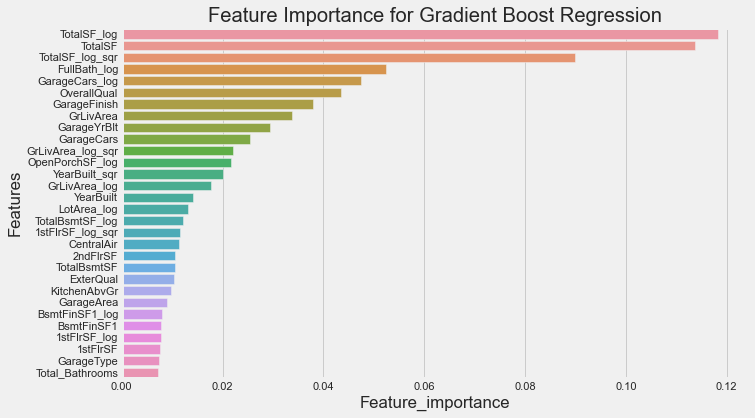

In [127]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance for Gradient Boost Regression')
sns.barplot(y='Features', x='Feature_importance', data=gbr_FIM.head(30))
plt.show()

## Ada Boosting Regression

In [128]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(X_ord_train, y_train)

y_hat= abr.predict(X_ord_test)

print(y_hat[:15])
print(y_test[:15])

print('Test R^2 Score : %.3f'%abr.score(X_ord_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%abr.score(X_ord_train,y_train))

# Name: SalePrice, dtype: float64
# Test R^2 Score : 0.875
# Training R^2 Score : 0.907

[11.3728456  11.95750969 11.88701297 12.05760249 11.77202271 11.81746738
 12.30007181 11.31644041 11.86605311 11.91438561 11.61243682 11.86460079
 12.29866462 11.38146628 12.29561442]
107     11.652696
33      12.016733
1197    11.877576
1042    12.185875
625     11.982935
1083    11.982935
621     12.388398
325     11.373675
1020    12.078245
1012    12.013707
51      11.648339
658     11.487618
446     12.154785
589     11.283525
447     12.205578
Name: SalePrice, dtype: float64
Test R^2 Score : 0.829
Training R^2 Score : 0.856


In [129]:
print("Base Estimator : ", abr.base_estimator_)
print("Feature Importances : ", abr.feature_importances_)
print("Estimators Shape : ", len(abr.estimators_))
abr.estimators_[:2]



Base Estimator :  DecisionTreeRegressor(max_depth=3)
Feature Importances :  [8.85127191e-04 0.00000000e+00 1.18274301e-02 1.37757195e-03
 6.13904273e-03 0.00000000e+00 0.00000000e+00 2.97891954e-05
 8.24376555e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.42926373e-02 0.00000000e+00 0.00000000e+00 5.35924192e-04
 0.00000000e+00 2.85686197e-01 2.89656794e-03 3.19248047e-03
 6.75159606e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.86860744e-08 7.54014474e-03
 3.15302756e-03 3.35166932e-04 1.67048897e-02 0.00000000e+00
 0.00000000e+00 9.11942916e-03 6.73246425e-03 0.00000000e+00
 0.00000000e+00 2.25832654e-03 0.00000000e+00 0.00000000e+00
 1.93171792e-02 1.46702167e-02 0.00000000e+00 4.31629265e-03
 5.76136064e-03 0.00000000e+00 2.36236944e-02 1.10755358e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.68839662e-02 3.10128477e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.73342695e-04 4.35581767e-03
 0.000000

[DecisionTreeRegressor(max_depth=3, random_state=1636754524),
 DecisionTreeRegressor(max_depth=3, random_state=845456173)]

In [130]:
%%time
n_samples = X_ord_train.shape[0]
n_features = X_ord_train.shape[1]

# # Best Parameters :  {'base_estimator': DecisionTreeRegressor(), 'learning_rate': 1.0, 'n_estimators': 500}
# ada_param = {
#             'base_estimator':[None, DecisionTreeRegressor(), 
#                               KNeighborsRegressor(), 
#                               SVR(),
#                               LinearRegression()],
#             'n_estimators': [500, 800, 1000, 1300, 1500],
#             'learning_rate': [0.5, 0.8, 1.0, 2.0 ]
#          }
# ada_param = {
#             'base_estimator':[None, DecisionTreeRegressor(), 
#                               KNeighborsRegressor(), 
#                               SVR(),
#                               LinearRegression()],
#             'n_estimators': [100, 300, 500],
#             'learning_rate': [1.0, 1.5, 2.0 ]
#          }
ada_param = {
            'base_estimator':[None, DecisionTreeRegressor()],
            'n_estimators': [100],
            'learning_rate': [1.0 ]
         }

# ada_param = {
#             'base_estimator':[LinearRegression()],
#             'n_estimators': [50],
#             'learning_rate': [1.5]
#          }

ada_search = GridSearchCV(AdaBoostRegressor(random_state=1), 
                                        param_grid=ada_param, 
                                        n_jobs=-1, cv=folds, verbose=5)
ada_result=ada_search.fit(X_ord_train,y_train)

print('Train R^2 Score : %.3f'%ada_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%ada_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%ada_result.best_score_)
print('Best Parameters : ',ada_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,ada_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,ada_search.predict(X_ord_test)),4))

# Best Parameters :  {'base_estimator': LinearRegression(), 'learning_rate': 1.0, 'n_estimators': 100}
# ada_search=AdaBoostRegressor(base_estimator=LinearRegression(),
#                             learning_rate=1.5,
#                             n_estimators=50)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.999
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'base_estimator': LinearRegression(), 'learning_rate': 1.5, 'n_estimators': 50}
# Training mse :  0.0
# Testing mse :  0.0
# CPU times: user 5.13 s, sys: 3.33 s, total: 8.45 s
# Wall time: 2min 23s

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train R^2 Score : 1.000
Test R^2 Score : 0.908
Best R^2 Score Through Grid Search : 0.870
Best Parameters :  {'base_estimator': DecisionTreeRegressor(), 'learning_rate': 1.0, 'n_estimators': 100}
Training mse :  0.0
Testing mse :  0.0153
Wall time: 12.3 s


In [131]:
cross_val_results = pd.DataFrame(ada_search.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head() 

Number of Various Combinations of Parameters Tried : 2


mean_fit_time  std_fit_time  mean_score_time  std_score_time     param_base_estimator param_learning_rate param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       1.851337      0.423248         0.041940        0.013110                     None                 1.0                100  {'base_estimator': None, 'learning_rate': 1.0,...           0.832486           0.782043           0.825690           0.831913           0.788410         0.812109        0.022170                2
1       6.061583      0.442907         0.041431        0.014266  DecisionTreeRegressor()                 1.0                100  {'base_estimator': DecisionTreeRegressor(), 'l...           0.896215           0.861859           0.892399           0.858496           0.842536         0.870301        0.020695                1

In [132]:
ada_Regressor = AdaBoostRegressor(n_estimators = 100, 
                                  base_estimator=DecisionTreeRegressor(),
                                  random_state= rand_state)
ada_Regressor.fit(X_ord_train, y_train)

ada_importance = ada_Regressor.feature_importances_
ada_importance
ada_FIM = pd.DataFrame({'Features': X_ord_train.columns , 
                        'Feature_importance':ada_importance})
ada_FIM = ada_FIM.sort_values(by=['Feature_importance'], ascending=False)
ada_FIM

Features  Feature_importance
17       OverallQual        2.464951e-01
80           TotalSF        1.547843e-01
116      TotalSF_log        1.450320e-01
117  TotalSF_log_sqr        1.204330e-01
41        CentralAir        2.572308e-02
..               ...                 ...
113     PoolArea_log        1.015749e-05
83           haspool        3.546112e-06
72            PoolQC        3.082939e-06
5             Street        6.829576e-07
9          Utilities        0.000000e+00

[125 rows x 2 columns]

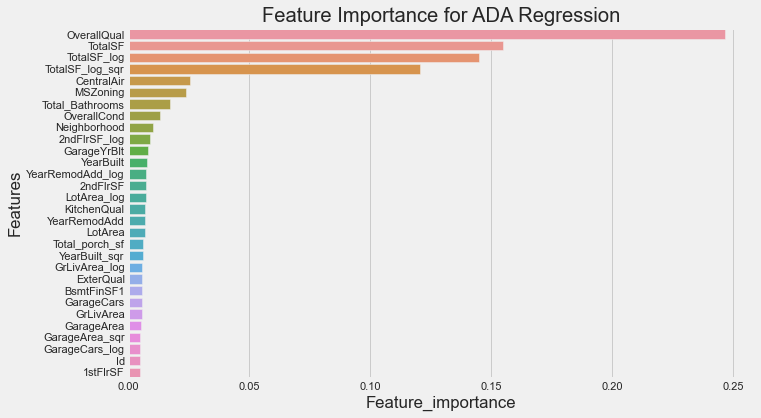

In [133]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance for ADA Regression')
sns.barplot(y='Features', x='Feature_importance', data=ada_FIM.head(30))
plt.show()

## XGB

In [134]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_ord_train, y_train, 
                  eval_set=[(X_ord_test, y_test)], 
                  eval_metric="mae", verbose=10)

print("Test  R2 Score : %.2f"%xgb_regressor.score(X_ord_test, y_test))
print("Train R2 Score : %.2f"%xgb_regressor.score(X_ord_train, y_train))

# Test  R2 Score : 0.93
# Train R2 Score : 1.00

[0]	validation_0-mae:8.04509
[10]	validation_0-mae:0.25372
[20]	validation_0-mae:0.09550
[30]	validation_0-mae:0.09279
[40]	validation_0-mae:0.09349
[50]	validation_0-mae:0.09386
[60]	validation_0-mae:0.09399
[70]	validation_0-mae:0.09436
[80]	validation_0-mae:0.09464
[90]	validation_0-mae:0.09486
[99]	validation_0-mae:0.09476
Test  R2 Score : 0.90
Train R2 Score : 1.00


In [135]:
print("Default Number of Estimators : ",xgb_regressor.n_estimators)
print("Default Max Depth of Trees   : ", xgb_regressor.max_depth)
print("Feature Importances : ")
pd.DataFrame([xgb_regressor.feature_importances_], columns=X_ord_train.columns)


Default Number of Estimators :  100
Default Max Depth of Trees   :  None
Feature Importances : 


Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street     Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC    Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  SaleCondition   TotalSF  Total_Bathrooms  Total_porch_sf  haspool  \
0  0.000963     0.00136  0.020912     0.001393  0.004214     0.0  0.000587  0.002909     0.013731        0.0   0.001826   0.000826      0.004637    0.003428    0.000178    0.0025    0.002664     0.191958     0.016781   0.008002      0.031914   0.001857  0.009435     0.002398     0.001586    0.001741    0.000921   0.002314   0.007949    0.001061  0.005483   0.01267      0.003894      0.000554    0.005321      0.004796    0.001473   0.003651     0.002433  0.000054   0.000909    0.016553    0.000808  0.006409  0.002663      0.005204   0.003941       0.00052      0.003605  0.001463  0.004815      0.002346      0.084047     0.033166      0.001385    0.018572    0.008377     0.002334    0.009817      0.00411      0.003957    0.101253    0.004432    0.001125         0.0    0.003045    0.001017     0.002933        0.00354   0.003694     0.001404  0.009677     0.0  0.00177     0.006398  0.000567  0.002088  0.001132   0.00151       0.009171  0.146761         0.099584        0.003526      0.0   

   has2ndfloor  hasgarage  hasbsmt  hasfireplace  LotFrontage_log  LotArea_log  MasVnrArea_log  BsmtFinSF1_log  BsmtFinSF2_log  BsmtUnfSF_log  TotalBsmtSF_log  1stFlrSF_log  2ndFlrSF_log  LowQualFinSF_log  GrLivArea_log  BsmtFullBath_log  BsmtHalfBath_log  FullBath_log  HalfBath_log  BedroomAbvGr_log  KitchenAbvGr_log  TotRmsAbvGrd_log  Fireplaces_log  GarageCars_log  WoodDeckSF_log  OpenPorchSF_log  EnclosedPorch_log  3SsnPorch_log  ScreenPorch_log  PoolArea_log  MiscVal_log  YearRemodAdd_log  TotalSF_log  TotalSF_log_sqr  GrLivArea_log_sqr  GarageArea_sqr  TotalBsmtSF_log_sqr  1stFlrSF_log_sqr  YearBuilt_sqr  FullBath_log_sqr  2ndFlrSF_log_sqr  
0          0.0        0.0      0.0           0.0              0.0          0.0             0.0             0.0             0.0            0.0              0.0           0.0           0.0               0.0            0.0               0.0               0.0           0.0           0.0               0.0               0.0               0.0             0.0             0.0             0.0              0.0                0.0            0.0              0.0           0.0          0.0               0.0          0.0              0.0                0.0             0.0                  0.0               0.0            0.0               0.0               0.0

In [136]:
%%time

# xgb_param = {
#         'n_estimators': [500, 800, 1000,1300, 1500],
#         'max_depth': [15, 20, 25, 30],
#         'eta': [0.01, 0.05, 0.1, 0.5, 1]
#         }
# xgb_param = {
#         'n_estimators': [1500, 2000, 3000],
#         'max_depth': [15, 20, 25, 30],
#         'eta': [0.01, 0.05, 0.1, 0.5, 1]
#         }

xgb_param = {
        'n_estimators': [2000],
        'max_depth': [5],
        'eta': [0.01]
        }
xgb_search = GridSearchCV(xgb.XGBRegressor(), xgb_param, n_jobs=-1, cv=folds)

xgb_result=xgb_search.fit(X_ord_train, y_train)

print('Train R^2 Score : %.3f'%xgb_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%xgb_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%xgb_result.best_score_)
print('Best Parameters : ',xgb_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,xgb_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,xgb_search.predict(X_ord_test)),4))

# Best Parameters :  {'eta': 0.01, 'max_depth': 15, 'n_estimators': 1500}
# xgb_search=xgb.XGBRegressor(eta=0.01,
#                            max_depth=15,
#                            n_estimators=2000)
# Train R^2 Score : 1.000
# Test R^2 Score : 0.999
# Best R^2 Score Through Grid Search : 1.000
# Best Parameters :  {'eta': 0.01, 'max_depth': 15, 'n_estimators': 2000}
# Training mse :  0.0
# Testing mse :  0.0
# CPU times: user 43.8 s, sys: 364 ms, total: 44.2 s
# Wall time: 21min 48s

Train R^2 Score : 0.994
Test R^2 Score : 0.927
Best R^2 Score Through Grid Search : 0.890
Best Parameters :  {'eta': 0.01, 'max_depth': 5, 'n_estimators': 2000}
Training mse :  0.001
Testing mse :  0.0121
Wall time: 46.4 s


In [137]:
xgb_search_results = pd.DataFrame(xgb_search.cv_results_)
print("Grid Search Size : ", xgb_search_results.shape)
xgb_search_results.head()

Grid Search Size :  (1, 16)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta param_max_depth param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0      38.006596      0.254093          0.02381        0.003605      0.01               5               2000  {'eta': 0.01, 'max_depth': 5, 'n_estimators': ...           0.899913           0.871866           0.899612           0.907066           0.872524         0.890196         0.01494                1

In [138]:
xgb_Regressor = xgb.XGBRegressor(n_estimators = 100, 
                                  eta=0.1,
                                  random_state= rand_state)
xgb_Regressor.fit(X_ord_train, y_train)

xgb_importance = xgb_Regressor.feature_importances_
xgb_importance
xgb_FIM = pd.DataFrame({'Features': X_ord_train.columns , 
                        'Feature_importance':xgb_importance})
xgb_FIM = xgb_FIM.sort_values(by=['Feature_importance'], ascending=False)
xgb_FIM

Features  Feature_importance
61         GarageCars            0.214424
80            TotalSF            0.106504
81    Total_Bathrooms            0.104788
17        OverallQual            0.085077
41         CentralAir            0.055348
..                ...                 ...
96       2ndFlrSF_log            0.000000
97   LowQualFinSF_log            0.000000
98      GrLivArea_log            0.000000
74        MiscFeature            0.000000
124  2ndFlrSF_log_sqr            0.000000

[125 rows x 2 columns]

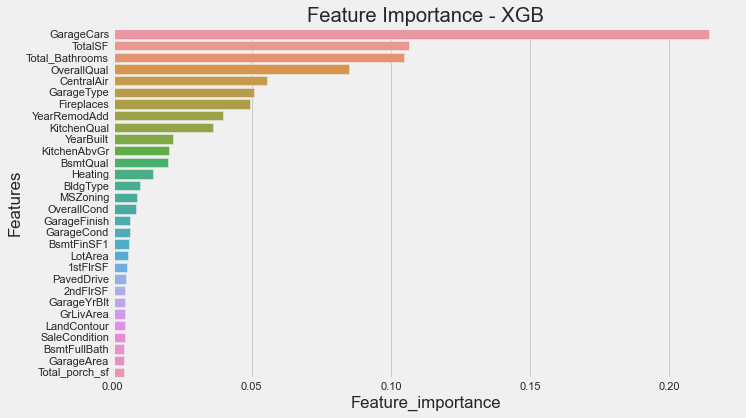

In [139]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance - XGB')
sns.barplot(y='Features', x='Feature_importance', data=xgb_FIM.head(30))
plt.show()

## Cat Boost Regression

In [140]:
from catboost import CatBoost
from sklearn.metrics import r2_score

cbr = CatBoost(params={'iterations':100, 'verbose':10, 'loss_function':'RMSE'})

cbr.fit(X_ord_train, y_train)
cbr.set_feature_names(X_ord_train.columns)

y_hat_test = cbr.predict(X_ord_test)
y_hat_train = cbr.predict(X_ord_train)

from catboost.utils import eval_metric

# print("Test  R2 : %.2f"%eval_metric(y_test, y_hat_test, "R2"))
# print("Train R2 : %.2f"%eval_metric(y_train, y_hat_train, "R2"))

def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))
def r2(y, y_hat):
    return r2_score(y, y_hat)
    
print("Test  R2 : %.2f"%r2(y_test, y_hat_test))
print("Train R2 : %.2f"%r2(y_train, y_hat_train))

# Test  R2 : 0.89
# Train R2 : 0.99

Learning rate set to 0.272794
0:	learn: 0.3279842	total: 172ms	remaining: 17s
10:	learn: 0.1413424	total: 233ms	remaining: 1.88s
20:	learn: 0.1142195	total: 295ms	remaining: 1.11s
30:	learn: 0.0991944	total: 365ms	remaining: 813ms
40:	learn: 0.0884839	total: 421ms	remaining: 606ms
50:	learn: 0.0766853	total: 500ms	remaining: 480ms
60:	learn: 0.0685622	total: 585ms	remaining: 374ms
70:	learn: 0.0610330	total: 664ms	remaining: 271ms
80:	learn: 0.0559386	total: 728ms	remaining: 171ms
90:	learn: 0.0509962	total: 798ms	remaining: 78.9ms
99:	learn: 0.0474554	total: 874ms	remaining: 0us
Test  R2 : 0.91
Train R2 : 0.99


In [141]:
# Shrink Estimator by Reducing Number of Trees in Ensemble
cbr.shrink(ntree_end=50)

y_hat_test = cbr.predict(X_ord_test)
y_hat_train = cbr.predict(X_ord_train)

print("Test  R2 : %.2f"%r2(y_test, y_hat_test))
print("Train R2 : %.2f"%r2(y_train, y_hat_train))

# Test  R2 : 0.89
# Train R2 : 0.97


Test  R2 : 0.90
Train R2 : 0.96


In [142]:
print("Best Score                : ",cbr.best_score_)
print("\nList of Target Classses : ",cbr.classes_)
print("\nData Feature Names      : ",cbr.feature_names_)
print("\nFeature Importance      : ", cbr.feature_importances_)
print("\nLearning Rate           : ",cbr.learning_rate_)
print("\nRandom Seed             : ",cbr.random_seed_)
print("\nNumber of Trees         : ",cbr.tree_count_)
print("\nNumber of Features      : ",cbr.n_features_in_)

Best Score                :  {'learn': {'RMSE': 0.04745543368142282}}

List of Target Classses :  []

Data Feature Names      :  ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Garage

In [143]:
y_train.shape

(1168,)

In [144]:
%%time

from catboost import CatBoostRegressor

# Best Parameters :  {'bootstrap_type': 'No', 'iterations': 100, 'learning_rate': 0.1}
# cbr_param = {
#             'iterations':[10,50, 80, 100],
#             'learning_rate':[0.01,0.05, 0.1, 0.5, 1],
#             'bootstrap_type':['Bayesian', 'Bernoulli', 'No']
# }
# cbr_param = {
#             'iterations':[100, 120, 150],
#             'learning_rate':[0.05, 0.1, 0.5],
#             'bootstrap_type':['Bayesian', 'Bernoulli', 'No']
# }
cbr_param = {
            'iterations':[200],
            'learning_rate':[0.1],
            'bootstrap_type':['No']
}

cbr_search = GridSearchCV(CatBoostRegressor(),cbr_param, cv=folds)
cbr_result=cbr_search.fit(X_ord_train, y_train)
# Best Parameters :  {'bootstrap_type': 'No', 
#                     'iterations': 150, 
#                     'learning_rate': 0.1}

print('Train R^2 Score : %.3f'%cbr_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%cbr_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%cbr_result.best_score_)
print('Best Parameters : ',cbr_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,cbr_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,cbr_search.predict(X_ord_test)),4))

# cbr_search = CatBoostRegressor(
#     learning_rate=0.1,
#     bootstrap_type='No',
#     iterations=200,
#     random_state=rand_state)

# Train R^2 Score : 0.999
# Test R^2 Score : 0.992
# Best R^2 Score Through Grid Search : 0.991
# Best Parameters :  {'bootstrap_type': 'No', 'iterations': 200, 'learning_rate': 0.1}
# Training mse :  0.0
# Testing mse :  0.0003
# CPU times: user 7min 59s, sys: 27.8 s, total: 8min 26s
# Wall time: 2min 32s

0:	learn: 0.3738697	total: 11.3ms	remaining: 2.24s
1:	learn: 0.3504878	total: 18.6ms	remaining: 1.84s
2:	learn: 0.3274257	total: 27.3ms	remaining: 1.79s
3:	learn: 0.3079945	total: 34.4ms	remaining: 1.69s
4:	learn: 0.2901792	total: 42.2ms	remaining: 1.65s
5:	learn: 0.2762904	total: 50.2ms	remaining: 1.62s
6:	learn: 0.2627480	total: 57.5ms	remaining: 1.59s
7:	learn: 0.2498169	total: 64ms	remaining: 1.53s
8:	learn: 0.2403302	total: 71.4ms	remaining: 1.52s
9:	learn: 0.2296170	total: 84.3ms	remaining: 1.6s
10:	learn: 0.2200272	total: 94.9ms	remaining: 1.63s
11:	learn: 0.2117577	total: 104ms	remaining: 1.62s
12:	learn: 0.2038599	total: 113ms	remaining: 1.63s
13:	learn: 0.1953231	total: 121ms	remaining: 1.61s
14:	learn: 0.1881713	total: 130ms	remaining: 1.6s
15:	learn: 0.1816387	total: 139ms	remaining: 1.6s
16:	learn: 0.1760471	total: 146ms	remaining: 1.57s
17:	learn: 0.1702704	total: 153ms	remaining: 1.54s
18:	learn: 0.1658664	total: 160ms	remaining: 1.52s
19:	learn: 0.1617960	total: 167ms	r

162:	learn: 0.0628404	total: 1.28s	remaining: 292ms
163:	learn: 0.0625740	total: 1.29s	remaining: 284ms
164:	learn: 0.0622420	total: 1.3s	remaining: 276ms
165:	learn: 0.0620156	total: 1.31s	remaining: 268ms
166:	learn: 0.0618578	total: 1.32s	remaining: 261ms
167:	learn: 0.0614304	total: 1.33s	remaining: 253ms
168:	learn: 0.0612195	total: 1.34s	remaining: 245ms
169:	learn: 0.0611018	total: 1.34s	remaining: 237ms
170:	learn: 0.0610775	total: 1.35s	remaining: 229ms
171:	learn: 0.0608405	total: 1.36s	remaining: 222ms
172:	learn: 0.0606699	total: 1.37s	remaining: 214ms
173:	learn: 0.0603948	total: 1.38s	remaining: 206ms
174:	learn: 0.0601058	total: 1.38s	remaining: 198ms
175:	learn: 0.0599107	total: 1.39s	remaining: 190ms
176:	learn: 0.0596609	total: 1.4s	remaining: 182ms
177:	learn: 0.0596378	total: 1.41s	remaining: 174ms
178:	learn: 0.0594598	total: 1.41s	remaining: 166ms
179:	learn: 0.0593028	total: 1.42s	remaining: 158ms
180:	learn: 0.0589443	total: 1.43s	remaining: 150ms
181:	learn: 0.

122:	learn: 0.0718133	total: 969ms	remaining: 606ms
123:	learn: 0.0713418	total: 984ms	remaining: 603ms
124:	learn: 0.0709805	total: 1s	remaining: 601ms
125:	learn: 0.0705961	total: 1.01s	remaining: 596ms
126:	learn: 0.0700942	total: 1.02s	remaining: 588ms
127:	learn: 0.0698163	total: 1.03s	remaining: 581ms
128:	learn: 0.0697533	total: 1.04s	remaining: 573ms
129:	learn: 0.0692393	total: 1.05s	remaining: 567ms
130:	learn: 0.0688960	total: 1.06s	remaining: 559ms
131:	learn: 0.0685797	total: 1.07s	remaining: 553ms
132:	learn: 0.0681316	total: 1.08s	remaining: 546ms
133:	learn: 0.0677207	total: 1.09s	remaining: 538ms
134:	learn: 0.0672935	total: 1.1s	remaining: 531ms
135:	learn: 0.0667498	total: 1.12s	remaining: 527ms
136:	learn: 0.0666355	total: 1.13s	remaining: 521ms
137:	learn: 0.0663158	total: 1.14s	remaining: 512ms
138:	learn: 0.0660964	total: 1.15s	remaining: 504ms
139:	learn: 0.0660493	total: 1.16s	remaining: 496ms
140:	learn: 0.0655927	total: 1.17s	remaining: 489ms
141:	learn: 0.06

82:	learn: 0.0919805	total: 676ms	remaining: 953ms
83:	learn: 0.0911863	total: 685ms	remaining: 945ms
84:	learn: 0.0909214	total: 693ms	remaining: 937ms
85:	learn: 0.0900278	total: 701ms	remaining: 929ms
86:	learn: 0.0898041	total: 711ms	remaining: 923ms
87:	learn: 0.0891739	total: 720ms	remaining: 917ms
88:	learn: 0.0889688	total: 729ms	remaining: 909ms
89:	learn: 0.0888527	total: 739ms	remaining: 903ms
90:	learn: 0.0882416	total: 747ms	remaining: 895ms
91:	learn: 0.0879169	total: 755ms	remaining: 886ms
92:	learn: 0.0873920	total: 763ms	remaining: 878ms
93:	learn: 0.0869526	total: 771ms	remaining: 869ms
94:	learn: 0.0864766	total: 779ms	remaining: 861ms
95:	learn: 0.0863075	total: 786ms	remaining: 852ms
96:	learn: 0.0855910	total: 795ms	remaining: 844ms
97:	learn: 0.0849974	total: 804ms	remaining: 837ms
98:	learn: 0.0843992	total: 812ms	remaining: 828ms
99:	learn: 0.0837602	total: 820ms	remaining: 820ms
100:	learn: 0.0835238	total: 829ms	remaining: 813ms
101:	learn: 0.0830895	total: 8

49:	learn: 0.1099969	total: 394ms	remaining: 1.18s
50:	learn: 0.1089062	total: 404ms	remaining: 1.18s
51:	learn: 0.1083919	total: 413ms	remaining: 1.18s
52:	learn: 0.1078577	total: 422ms	remaining: 1.17s
53:	learn: 0.1066412	total: 432ms	remaining: 1.17s
54:	learn: 0.1059823	total: 441ms	remaining: 1.16s
55:	learn: 0.1050346	total: 450ms	remaining: 1.16s
56:	learn: 0.1042637	total: 459ms	remaining: 1.15s
57:	learn: 0.1039145	total: 467ms	remaining: 1.14s
58:	learn: 0.1033074	total: 476ms	remaining: 1.14s
59:	learn: 0.1026372	total: 485ms	remaining: 1.13s
60:	learn: 0.1018811	total: 494ms	remaining: 1.13s
61:	learn: 0.1015262	total: 502ms	remaining: 1.12s
62:	learn: 0.1009242	total: 510ms	remaining: 1.11s
63:	learn: 0.1003715	total: 518ms	remaining: 1.1s
64:	learn: 0.1000483	total: 525ms	remaining: 1.09s
65:	learn: 0.0992401	total: 532ms	remaining: 1.08s
66:	learn: 0.0987619	total: 540ms	remaining: 1.07s
67:	learn: 0.0983747	total: 548ms	remaining: 1.06s
68:	learn: 0.0977792	total: 560m

14:	learn: 0.1864407	total: 99ms	remaining: 1.22s
15:	learn: 0.1812444	total: 106ms	remaining: 1.22s
16:	learn: 0.1758408	total: 113ms	remaining: 1.21s
17:	learn: 0.1707809	total: 119ms	remaining: 1.21s
18:	learn: 0.1657580	total: 126ms	remaining: 1.2s
19:	learn: 0.1614140	total: 132ms	remaining: 1.19s
20:	learn: 0.1583014	total: 139ms	remaining: 1.19s
21:	learn: 0.1541718	total: 145ms	remaining: 1.18s
22:	learn: 0.1508681	total: 152ms	remaining: 1.17s
23:	learn: 0.1479583	total: 158ms	remaining: 1.16s
24:	learn: 0.1450417	total: 165ms	remaining: 1.15s
25:	learn: 0.1428128	total: 171ms	remaining: 1.15s
26:	learn: 0.1407383	total: 178ms	remaining: 1.14s
27:	learn: 0.1384227	total: 185ms	remaining: 1.14s
28:	learn: 0.1359479	total: 192ms	remaining: 1.13s
29:	learn: 0.1342088	total: 199ms	remaining: 1.13s
30:	learn: 0.1323746	total: 206ms	remaining: 1.12s
31:	learn: 0.1304806	total: 212ms	remaining: 1.11s
32:	learn: 0.1291606	total: 219ms	remaining: 1.11s
33:	learn: 0.1277024	total: 226ms

178:	learn: 0.0566191	total: 1.3s	remaining: 152ms
179:	learn: 0.0562990	total: 1.31s	remaining: 145ms
180:	learn: 0.0562643	total: 1.31s	remaining: 138ms
181:	learn: 0.0562278	total: 1.32s	remaining: 131ms
182:	learn: 0.0559476	total: 1.33s	remaining: 123ms
183:	learn: 0.0557516	total: 1.33s	remaining: 116ms
184:	learn: 0.0555200	total: 1.34s	remaining: 109ms
185:	learn: 0.0553808	total: 1.35s	remaining: 102ms
186:	learn: 0.0553564	total: 1.36s	remaining: 94.7ms
187:	learn: 0.0550822	total: 1.37s	remaining: 87.4ms
188:	learn: 0.0546632	total: 1.38s	remaining: 80.1ms
189:	learn: 0.0543857	total: 1.38s	remaining: 72.8ms
190:	learn: 0.0540685	total: 1.39s	remaining: 65.5ms
191:	learn: 0.0536599	total: 1.4s	remaining: 58.2ms
192:	learn: 0.0536362	total: 1.4s	remaining: 50.9ms
193:	learn: 0.0536141	total: 1.41s	remaining: 43.6ms
194:	learn: 0.0533263	total: 1.42s	remaining: 36.3ms
195:	learn: 0.0530730	total: 1.42s	remaining: 29ms
196:	learn: 0.0528380	total: 1.43s	remaining: 21.8ms
197:	l

149:	learn: 0.0700846	total: 1.09s	remaining: 363ms
150:	learn: 0.0697760	total: 1.1s	remaining: 356ms
151:	learn: 0.0694423	total: 1.11s	remaining: 351ms
152:	learn: 0.0691553	total: 1.12s	remaining: 344ms
153:	learn: 0.0688485	total: 1.13s	remaining: 338ms
154:	learn: 0.0685025	total: 1.14s	remaining: 331ms
155:	learn: 0.0681242	total: 1.15s	remaining: 324ms
156:	learn: 0.0677803	total: 1.16s	remaining: 317ms
157:	learn: 0.0674246	total: 1.17s	remaining: 310ms
158:	learn: 0.0671845	total: 1.17s	remaining: 302ms
159:	learn: 0.0668371	total: 1.18s	remaining: 295ms
160:	learn: 0.0667088	total: 1.19s	remaining: 288ms
161:	learn: 0.0666477	total: 1.2s	remaining: 281ms
162:	learn: 0.0663622	total: 1.2s	remaining: 273ms
163:	learn: 0.0660911	total: 1.21s	remaining: 266ms
164:	learn: 0.0659307	total: 1.24s	remaining: 262ms
165:	learn: 0.0657766	total: 1.25s	remaining: 257ms
166:	learn: 0.0655706	total: 1.26s	remaining: 250ms
167:	learn: 0.0652376	total: 1.27s	remaining: 243ms
168:	learn: 0.0

In [145]:
cv_results = pd.DataFrame(cbr_search.cv_results_)
print("Grid Search Size : ", cv_results.shape)
cv_results.head()

Grid Search Size :  (1, 16)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_bootstrap_type param_iterations param_learning_rate                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       1.712392      0.098527         0.013046        0.001991                   No              200                 0.1  {'bootstrap_type': 'No', 'iterations': 200, 'l...           0.886416           0.881623           0.905456           0.883595           0.883823         0.888183         0.00877                1

In [146]:
cbr = CatBoostRegressor(iterations = 50, 
               learning_rate= 0.1)

cbr.fit(X_ord_train, y_train)

cbr_importance = cbr.feature_importances_
cbr_importance
cbr_FIM = pd.DataFrame({'Features': X_ord_train.columns , 
                        'Feature_importance':cbr_importance})
cbr_FIM = cbr_FIM.sort_values(by=['Feature_importance'], ascending=False)
cbr_FIM

0:	learn: 0.3708623	total: 8.46ms	remaining: 415ms
1:	learn: 0.3494453	total: 15.8ms	remaining: 380ms
2:	learn: 0.3284724	total: 22.9ms	remaining: 359ms
3:	learn: 0.3104261	total: 30.6ms	remaining: 352ms
4:	learn: 0.2929944	total: 38.6ms	remaining: 347ms
5:	learn: 0.2773455	total: 46.3ms	remaining: 340ms
6:	learn: 0.2636144	total: 55ms	remaining: 338ms
7:	learn: 0.2502792	total: 62.6ms	remaining: 329ms
8:	learn: 0.2384843	total: 70.6ms	remaining: 322ms
9:	learn: 0.2282058	total: 80.4ms	remaining: 322ms
10:	learn: 0.2196184	total: 91.6ms	remaining: 325ms
11:	learn: 0.2113485	total: 99.3ms	remaining: 315ms
12:	learn: 0.2034573	total: 108ms	remaining: 307ms
13:	learn: 0.1959222	total: 116ms	remaining: 297ms
14:	learn: 0.1894378	total: 123ms	remaining: 288ms
15:	learn: 0.1825950	total: 132ms	remaining: 281ms
16:	learn: 0.1772316	total: 141ms	remaining: 274ms
17:	learn: 0.1723030	total: 150ms	remaining: 266ms
18:	learn: 0.1681121	total: 158ms	remaining: 257ms
19:	learn: 0.1637390	total: 166

Features  Feature_importance
17        OverallQual           19.158043
116       TotalSF_log           10.872040
117   TotalSF_log_sqr            9.208111
98      GrLivArea_log            3.768383
53        KitchenQual            3.541025
..                ...                 ...
90     MasVnrArea_log            0.000000
92     BsmtFinSF2_log            0.000000
35       BsmtFinType2            0.000000
97   LowQualFinSF_log            0.000000
0                  Id            0.000000

[125 rows x 2 columns]

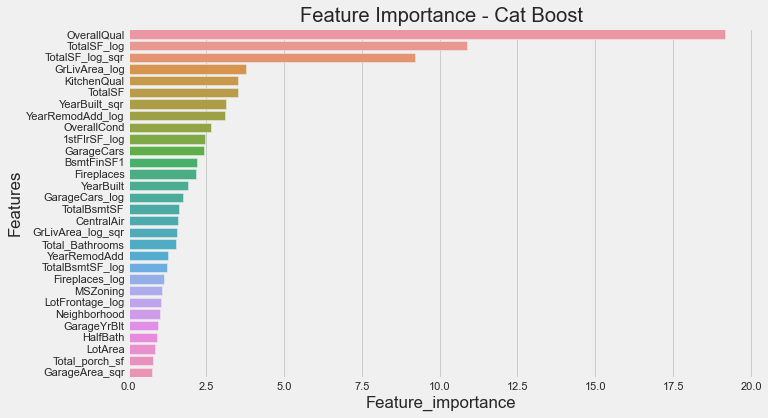

In [147]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance - Cat Boost')
sns.barplot(y='Features', x='Feature_importance', data=cbr_FIM.head(30))
plt.show()

## LightGBM 

- default parameters for boosting methods:
https://github.com/arnaudvl/ml-parameter-optimization/blob/master/mlopt/ml_tune.py

In [148]:
import lightgbm as lgb

In [149]:
lgbr = lgb.LGBMRegressor(objective="regression_l2", n_estimators=10,)

lgbr.fit(X_ord_train, y_train, 
         eval_set=[(X_ord_test, y_test),], 
         eval_metric=["rmse", "l2", "l1"])

print("\nTest  R2 Score : %.2f"%lgbr.score(X_ord_train, y_train))
print("Train R2 Score : %.2f"%lgbr.score(X_ord_test, y_test))

# Test  R2 Score : 0.81
# Train R2 Score : 0.77

[1]	valid_0's rmse: 0.375228	valid_0's l2: 0.140796	valid_0's l1: 0.286666
[2]	valid_0's rmse: 0.346828	valid_0's l2: 0.120289	valid_0's l1: 0.262616
[3]	valid_0's rmse: 0.320654	valid_0's l2: 0.102819	valid_0's l1: 0.240649
[4]	valid_0's rmse: 0.29796	valid_0's l2: 0.0887803	valid_0's l1: 0.220917
[5]	valid_0's rmse: 0.278992	valid_0's l2: 0.0778368	valid_0's l1: 0.204536
[6]	valid_0's rmse: 0.260499	valid_0's l2: 0.0678597	valid_0's l1: 0.189477
[7]	valid_0's rmse: 0.24481	valid_0's l2: 0.0599322	valid_0's l1: 0.176695
[8]	valid_0's rmse: 0.229453	valid_0's l2: 0.0526489	valid_0's l1: 0.1642
[9]	valid_0's rmse: 0.216794	valid_0's l2: 0.0469998	valid_0's l1: 0.154196
[10]	valid_0's rmse: 0.206198	valid_0's l2: 0.0425178	valid_0's l1: 0.14507

Test  R2 Score : 0.78
Train R2 Score : 0.74


In [150]:
%%time

# lgbr_param = {
#         'n_estimators': [500, 800, 1000,1300, 1500],
#         'max_depth': [10, 15,20,25,30],
#         'learning_rate': [0.1, 0.5, 1],
#         'boosting_type': ['dart']
#         }
# Best Parameters :  {'boosting_type': 'dart', 'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 1300}
# Best Parameters :  {'boosting_type': 'dart', 'learning_rate': 0.8, 'max_depth': 15, 'n_estimators': 1300}

# lgbr_param = {
#         'n_estimators': [1300,1500, 2000, 3000],
#         'max_depth': [10, 15,20,30],
#         'learning_rate': [ 0.8, 0.9, 1],
#         'boosting_type': ['dart']
#         }
lgbr_param = {
        'n_estimators': [3000],
        'max_depth': [10],
        'learning_rate': [ 0.2],
        'boosting_type': ['dart']
        }
lgbr_search = GridSearchCV(lgb.LGBMRegressor(), lgbr_param, n_jobs=-1, cv=folds)

lgbr_result=lgbr_search.fit(X_ord_train, y_train)

print('')
print('Train R^2 Score : %.3f'%lgbr_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%lgbr_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%lgbr_result.best_score_)
print('Best Parameters : ',lgbr_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,lgbr_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,lgbr_search.predict(X_ord_test)),4))

# lgbr_search = LGBMRegressor(learning_rate=0.8,
#                             boosting_type='dart',
#                             max_depth=15,
#                             n_estimators=3000,
#                             random_state=rand_state)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.985
# Best R^2 Score Through Grid Search : 0.985
# Best Parameters :  {'boosting_type': 'dart', 'learning_rate': 0.8, 'max_depth': 15, 'n_estimators': 3000}
# Training mse :  0.0
# Testing mse :  0.0007


Train R^2 Score : 0.999
Test R^2 Score : 0.923
Best R^2 Score Through Grid Search : 0.880
Best Parameters :  {'boosting_type': 'dart', 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 3000}
Training mse :  0.0002
Testing mse :  0.0129
Wall time: 1min 11s


In [151]:
cv_results = pd.DataFrame(lgbr_search.cv_results_)
print("Grid Search Size : ", cv_results.shape)
cv_results.head()

Grid Search Size :  (1, 17)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_boosting_type param_learning_rate param_max_depth param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0      40.747167      0.269021         0.351755        0.062889                dart                 0.2              10               3000  {'boosting_type': 'dart', 'learning_rate': 0.2...           0.879301           0.873293           0.878945           0.891705           0.878928         0.880434        0.006063                1

In [152]:
lgbr = lgb.LGBMRegressor(boosting_type = 'dart', 
               learning_rate= 0.5,
                   max_depth=5,
                   n_estimators=300)

lgbr.fit(X_ord_train, y_train)

lgbr_importance = lgbr.feature_importances_
lgbr_importance
lgbr_FIM = pd.DataFrame({'Features': X_ord_train.columns , 
                        'Feature_importance':lgbr_importance})
lgbr_FIM = lgbr_FIM.sort_values(by=['Feature_importance'], ascending=False)
lgbr_FIM

Features  Feature_importance
80            TotalSF                 475
4             LotArea                 272
62         GarageArea                 234
46          GrLivArea                 221
82     Total_porch_sf                 197
..                ...                 ...
93      BsmtUnfSF_log                   0
94    TotalBsmtSF_log                   0
95       1stFlrSF_log                   0
96       2ndFlrSF_log                   0
124  2ndFlrSF_log_sqr                   0

[125 rows x 2 columns]

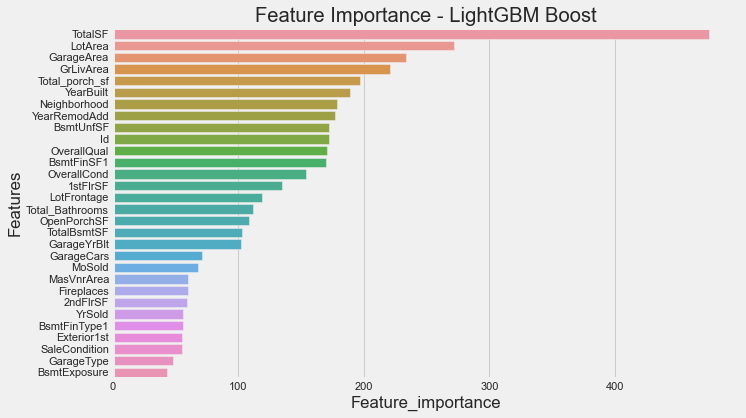

In [153]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance - LightGBM Boost')
sns.barplot(y='Features', x='Feature_importance', data=lgbr_FIM.head(30))
plt.show()

## Blended Model

In [154]:
def blended_predict(train_or_test):
    if train_or_test=='train':
        return ((0.2 * lasso_search.predict(Xd_sc_train)) + \
                (0.1 * svr_search.predict(Xd_sc_train)) + \
                (0.3 * xgb_search.predict(X_ord_train)) + \
                (0.3 * cbr_search.predict(X_ord_train)) + \
                (0.2 * lgbr_search.predict(X_ord_train)))
    else:
        return ((0.1 * lasso_search.predict(Xd_sc_test)) + \
                (0.1 * svr_search.predict(Xd_sc_test)) + \
                (0.1 * xgb_search.predict(X_ord_test)) + \
                (0.1 * cbr_search.predict(X_ord_train)) + \
                (0.1 * lgbr_search.predict(X_ord_test)))  

# def blended_predict(train_or_test):
#     if train_or_test=='train':
#         return (
#                 (0.3 * svr_search.predict(Xd_sc_train)) + \
#                 (0.2 * gbr_search.predict(X_ord_train)) + \
#                 (0.1 * ada_search.predict(X_ord_train)) + \
#                 (0.1 * xgb_search.predict(X_ord_train)) + \
#                 (0.1 * cbr_search.predict(X_ord_train)) + \
#                 (0.2 * lgbr_search.predict(X_ord_train)))
#     else:
#         return (
#                 (0.3 * svr_search.predict(Xd_sc_test)) + \
#                 (0.2 * gbr_search.predict(X_ord_test)) + \
#                 (0.1 * ada_search.predict(X_ord_test)) + \
#                 (0.1 * xgb_search.predict(X_ord_test)) + \
#                 (0.1 * cbr_search.predict(X_ord_test)) + \
#                 (0.2 * lgbr_search.predict(X_ord_test)))  

In [155]:
df=pd.DataFrame()    

def score_list(regr, search=None , result=None , 
               X_train=None , y_train=y_train , 
               X_test=None , y_test=y_test ):
    if regr=='Blended Model':
        y_pred_train=blended_predict('train')
        y_pred_test=blended_predict('test')
        
        score_train=round(r2_score(y_train, y_pred_train),4)
        score_test=round(r2_score(y_test, y_pred_test),4)

        mse_train=round(mean_squared_error(y_train,y_pred_train),4)
        mse_test=round(mean_squared_error(y_test,y_pred_test),4)

        rmse_train=round(np.sqrt(mse_train),5) 
        rmse_test=round(np.sqrt(mse_test),5)  
        
    else:
#         score_train=round(result.best_estimator_.score(X_train,y_train),4)
#         score_test=round(result.best_estimator_.score(X_test,y_test),4)

        score_train=round(search.score(X_train,y_train),4)
        score_test=round(search.score(X_test,y_test),4)


        mse_train=round(mean_squared_error(y_train,search.predict(X_train)),4)
        mse_test=round(mean_squared_error(y_test,search.predict(X_test)),4)


        rmse_train=round(np.sqrt(mse_train),5)    
        rmse_test=round(np.sqrt(mse_test),5)    


    df[regr]=[score_train, mse_train, rmse_train, score_test,mse_test,rmse_test]
    return df 
    
    
# stack_gen1 = StackingCVRegressor(regressors=(lasso_search, ridge_search, net_search, svr_search),
#                                 meta_regressor=net_search,
#                                 use_features_in_secondary=True)
# stack_gen2 = StackingCVRegressor(regressors=(rf_search, gbr_search, ada_search, cbr_search, lgbr_search),
#                                 meta_regressor=lgbr_search,
#                                 use_features_in_secondary=True)
# stack_result = stack_gen1.fit(Xd_sc_train, yd_train)
# stack_result = stack_gen2.fit(X_ord_train, yd_train)

    
# df['Scores']=['Train Score', 'Test Score', 'Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE']
df=score_list('Linear Model', lm_search, lm_result, Xd_train, yd_train, Xd_test, yd_test)
df=score_list('Lasso', lasso_search, lasso_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
df=score_list('Ridge', ridge_search, ridge_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
df=score_list('ElasticNet', net_search, net_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
df=score_list('Decision Tree', dt_search, dt_result, X_lb_train, yd_train, X_lb_test, yd_test)
df=score_list('SVR', svr_search, svr_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
df=score_list('Random Forest', rf_search, rf_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('GBM', gbr_search, gbr_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('ADA', ada_search, ada_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('XGBoost', xgb_search, xgb_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('Cat Boost', cbr_search, cbr_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('LightGBM', lgbr_search, lgbr_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('PCA-Linear', pca_lm_search, pca_lm_result, Xd_reduced_train, yd_train, Xd_reduced_test, yd_test)
df=score_list('PCA-Lasso', pca_lasso_search, pca_lasso_result, Xd_sc_reduced_train, yd_train, Xd_sc_reduced_test, yd_test)
df=score_list('PCA-Ridge', pca_ridge_search, pca_ridge_result, Xd_sc_reduced_train, yd_train, Xd_sc_reduced_test, yd_test)
df=score_list('PCA-ElasticNet', pca_net_search, pca_net_result, Xd_sc_reduced_train, yd_train, Xd_sc_reduced_test, yd_test)
df=score_list('PCA-KNN', knn_search, knn_result, Xd_reduced_train, yd_train, Xd_reduced_test, yd_test)
# df=score_list('Stack1', stack_gen1, net_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
# df=score_list('Stack2', stack_gen2, lgbr_result, X_ord_train, yd_train, X_ord_test, yd_test)
df=score_list(regr='Blended Model')

df=df.transpose()
df.columns=['Train Score', 'Train MSE', 'Train RMSE', 'Test Score', 'Test MSE',  'Test RMSE']

In [156]:
df1=df.sort_values('Test RMSE',ascending=True)
df1.style.format({
    'Train Score': '{:,.2%}'.format,
    'Train MSE': '{:,.4f}'.format,
    'Train RMSE': '{:,.5f}'.format,
    'Test Score': '{:,.2%}'.format,
    'Test MSE': '{:,.4f}'.format,
    'Test RMSE': '{:,.5f}'.format
})
df1

Train Score  Train MSE  Train RMSE    Test Score     Test MSE  Test RMSE
Blended Model        0.9683     0.0050     0.07071  9.348000e-01       0.0109    0.10440
XGBoost              0.9939     0.0010     0.03162  9.272000e-01       0.0121    0.11000
Cat Boost            0.9789     0.0033     0.05745  9.256000e-01       0.0124    0.11136
Lasso                0.9422     0.0091     0.09539  9.227000e-01       0.0129    0.11358
LightGBM             0.9987     0.0002     0.01414  9.226000e-01       0.0129    0.11358
SVR                  0.9178     0.0129     0.11358  9.196000e-01       0.0134    0.11576
PCA-ElasticNet       0.9412     0.0093     0.09644  9.127000e-01       0.0145    0.12042
PCA-Ridge            0.9412     0.0093     0.09644  9.127000e-01       0.0145    0.12042
PCA-Lasso            0.9412     0.0093     0.09644  9.128000e-01       0.0145    0.12042
Ridge                0.9511     0.0077     0.08775  9.105000e-01       0.0149    0.12207
ADA                  0.9997     0.0000     0.00000  9.080000e-01       0.0153    0.12369
Random Forest        0.9813     0.0030     0.05477  9.077000e-01       0.0154    0.12410
ElasticNet           0.9520     0.0076     0.08718  9.068000e-01       0.0155    0.12450
GBM                  1.0000     0.0000     0.00000  7.685000e-01       0.0385    0.19621
Decision Tree        0.9777     0.0035     0.05916  2.171000e-01       0.1303    0.36097
PCA-Linear           0.1604     0.1323     0.36373  1.081000e-01       0.1485    0.38536
PCA-KNN             -0.2933     0.2037     0.45133 -1.326000e-01       0.1885    0.43417
Linear Model         0.9503     0.0078     0.08832 -1.532195e+06  255049.7366  505.02449

In [157]:
def blended_predict_final():
    return ((0.1 * lasso_search.predict(test_sc)) + \
            (0.1 * svr_search.predict(test_sc)) + \
            (0.3 * xgb_search.predict(test_ord)) + \
            (0.3 * cbr_search.predict(test_ord)) + \
            (0.2 * lgbr_search.predict(test_ord)))

# def blended_predict_final():
#     return (
#             (0.3 * svr_search.predict(test_sc)) + \
#             (0.2 * gbr_search.predict(test_ord)) + \
#             (0.1 * ada_search.predict(test_ord)) + \
#             (0.1 * xgb_search.predict(test_ord)) + \
#             (0.1 * cbr_search.predict(test_ord)) + \
#             (0.2 * lgbr_search.predict(test_ord)))
y_pred_final=blended_predict_final()

In [158]:
submission = pd.read_csv("data/sample_submission.csv")
# submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")

# submission.iloc[:,1] = np.floor(np.expm1(y_pred_final))
submission.iloc[:,1] = np.floor(np.expm1(y_pred_final))
submission

Id  SalePrice
0     1461   124902.0
1     1462   156249.0
2     1463   183140.0
3     1464   186223.0
4     1465   186360.0
...    ...        ...
1454  2915   102707.0
1455  2916    95179.0
1456  2917   172903.0
1457  2918   117520.0
1458  2919   221980.0

[1459 rows x 2 columns]

In [159]:
# Save predictions in format used for competition scoring
# submission.to_csv('data/submission.csv', index=False)
submission.to_csv('submission.csv', index=False)